<div style=" background-color: RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 CRUDER LEA</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python
</h2>

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, chargement des fichiers</h2>

* Analyse réalisée sur les versions nettoyées

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.1 - Importation des librairies</h3>

In [1]:
# Importation des librairies 

import pandas as pd
import numpy as np
from decimal import *
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import time
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.2 - Chargement des fichiers Excel</h3>

In [2]:
# Importation du fichier customers.csv

fichier_clients = pd.read_csv('customers.csv', sep=';')

In [3]:
# Affichage

fichier_clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


In [4]:
# Importation du fichier products.csv

fichier_produits = pd.read_csv('products.csv', sep=';')

In [5]:
# Affichage

fichier_produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [6]:
# Importation du fichier transactions.csv

fichier_transactions = pd.read_csv('transactions.csv',sep=';')

In [7]:
# Affichage

fichier_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.1 - Analyse exploratoire du fichier clients</h3>

In [8]:
# Affichage du df

fichier_clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


In [9]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} lignes(s)".format(fichier_clients.shape[0]))
print("Le tableau comporte {} colonne(s)".format(fichier_clients.shape[1]))

Le tableau comporte 8621 lignes(s)
Le tableau comporte 3 colonne(s)


In [10]:
# Affichage des infos du dataset / recherche de valeurs nulles

fichier_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [11]:
# Recherche de valeurs aberrantes

fichier_clients.describe()

,birth
count,8621.000000
mean,1978.275606
std,16.917958
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [12]:
# Recherche de doublons sur les lignes entières

fichier_clients.duplicated().sum()

0

In [13]:
# Recherche de doublons sur la clé

fichier_clients['client_id'].duplicated().sum()

0

In [14]:
# Verification 2 de l'unicité 

fichier_clients['client_id'].unique().shape[0]

8621

In [15]:
# Recherche des clients tests 

fichier_clients.loc[fichier_clients['client_id'].str.contains('t'),:]

,client_id,sex,birth


In [16]:
# Ajout de la colonne age et calcul

date = datetime.date.today()
fichier_clients['age'] = date.year-fichier_clients['birth']

In [17]:
# Vérification

fichier_clients

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8616,c_7920,m,1956,67
8617,c_7403,f,1970,53
8618,c_5119,m,1974,49
8619,c_5643,f,1968,55


In [18]:
# Vérification erreurs potentielles dans la colonne sex

fichier_clients['sex'].unique().shape[0]

2

In [19]:
# Ajout de la colonne genre

def set_values(row, value):
    return value[row]
   
map_dictionary ={'m' : 'Homme', 'f' :'Femme'} 
   
fichier_clients['genre'] = fichier_clients['sex'].apply(set_values, args =(map_dictionary, )) 
fichier_clients.head(20)

,client_id,sex,birth,age,genre
0,c_4410,f,1967,56,Femme
1,c_7839,f,1975,48,Femme
2,c_1699,f,1984,39,Femme
3,c_5961,f,1962,61,Femme
4,c_5320,m,1943,80,Homme
5,c_415,m,1993,30,Homme
6,c_285,f,1967,56,Femme
7,c_160,f,1978,45,Femme
8,c_6446,m,1971,52,Homme
9,c_6866,m,1993,30,Homme


In [20]:
# Vérification

fichier_clients['genre'].unique().shape[0]

2

In [21]:
# Suppression colonnes inutiles 

fichier_clients = fichier_clients.drop(columns={'birth', 'sex'})

In [22]:
# Changement de nom des colonnes

fichier_clients.rename(columns = {'client_id':'id_client'}, inplace=True)

In [23]:
# Affichage du df

fichier_clients

,id_client,age,genre
0,c_4410,56,Femme
1,c_7839,48,Femme
2,c_1699,39,Femme
3,c_5961,61,Femme
4,c_5320,80,Homme
...,...,...,...
8616,c_7920,67,Homme
8617,c_7403,53,Femme
8618,c_5119,49,Homme
8619,c_5643,55,Femme


In [24]:
fichier_clients.describe()

,age
count,8621.000000
mean,44.724394
std,16.917958
min,19.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,94.000000


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.2 - Analyse exploratoire du fichier produits</h3>

In [25]:
# Affichage du df

fichier_produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [26]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} lignes(s)".format(fichier_produits.shape[0]))
print("Le tableau comporte {} colonne(s)".format(fichier_produits.shape[1]))

Le tableau comporte 3286 lignes(s)
Le tableau comporte 3 colonne(s)


In [27]:
# Affichage des infos du dataset / recherche de valeurs nulles

fichier_produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [28]:
# Recherche de valeurs aberrantes

fichier_produits.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [29]:
# Filtrage des prix négatifs

fichier_produits = fichier_produits[fichier_produits['price'] >= 0 ]
fichier_produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [30]:
# Recherche de produits tests

fichier_produits.loc[fichier_produits['id_prod'].str.contains('t'),:]

,id_prod,price,categ


In [31]:
# Recherche de doublons 

fichier_produits.duplicated().sum()

0

In [32]:
# Comptage des valeurs uniques

fichier_produits['id_prod'].unique().shape[0]

3286

In [33]:
# Recherche de doublons sur la clé 

fichier_produits['id_prod'].duplicated().sum()

0

In [34]:
# Changement de nom des colonnes

fichier_produits.rename(columns = {'id_prod':'id_produit','price':'prix','categ':'categorie'}, inplace=True)

In [35]:
# Affichage 

fichier_produits

,id_produit,prix,categorie
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.3 - Analyse exploratoire du fichier ventes</h3>

In [36]:
# Affichage du df

fichier_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [37]:
# Affichage des infos

fichier_transactions.describe()

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


In [38]:
fichier_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [39]:
# Recherche de doublons sur les lignes entières

fichier_transactions.duplicated().sum()

0

In [40]:
# Affichage des doublons 

print(fichier_transactions.loc[fichier_transactions.duplicated()])

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


In [41]:
# Recherche des tests 

fichier_transactions.loc[fichier_transactions['client_id'].str.contains('t'),:]

,id_prod,date,session_id,client_id


In [42]:
# Recherche de doublons sur les lignes entières

fichier_transactions.duplicated().sum()

0

In [43]:
# Traitement des dates

df = fichier_transactions['date'].str.split(' ', expand=True)
fichier_transactions['date_vente'] = df[0]

In [44]:
# Traitement des heures

df1 = df[1].str.split('.', expand=True)
fichier_transactions['heure_vente'] = df1[0]

In [45]:
# Affichage des heures en erreur

fichier_transactions.loc[fichier_transactions['heure_vente'] >= '24',:]

,id_prod,date,session_id,client_id,date_vente,heure_vente
198325,1_400,2021-10-02 24:04:58.422464,s_107311,c_2513,2021-10-02,24:04:58
198326,1_601,2021-10-02 24:04:59.254020,s_107311,c_2513,2021-10-02,24:04:59
198327,1_735,2021-10-02 24:04:59.422464,s_107311,c_2513,2021-10-02,24:04:59
198328,1_351,2021-10-02 24:04:59.913108,s_107311,c_2513,2021-10-02,24:04:59
198329,1_400,2021-10-02 24:06:02.588166,s_107205,c_5036,2021-10-02,24:06:02
...,...,...,...,...,...,...
221108,1_445,2021-10-26 24:36:01.240212,s_105041,c_3949,2021-10-26,24:36:01
221109,1_296,2021-10-26 24:36:21.240212,s_105041,c_3949,2021-10-26,24:36:21
221820,1_45,2021-10-27 24:18:21.505552,s_98882,c_7656,2021-10-27,24:18:21
221821,1_431,2021-10-27 24:20:46.744883,s_99594,c_8073,2021-10-27,24:20:46


In [46]:
# Traitement des erreurs

fichier_transactions['heure_vente'][fichier_transactions['heure_vente'] > '24'] = "00:00:00"


In [47]:
# Vérification

fichier_transactions.loc[fichier_transactions['heure_vente'] >= '24',:]

,id_prod,date,session_id,client_id,date_vente,heure_vente


In [48]:
# Concaténation des dates et heures nettoyées

fichier_transactions['date_de_vente'] = fichier_transactions['date_vente'] + ' ' + fichier_transactions['heure_vente']

In [49]:
# Vérification

fichier_transactions

,id_prod,date,session_id,client_id,date_vente,heure_vente,date_de_vente
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021-03-01,00:01:07,2021-03-01 00:01:07
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021-03-01,00:02:26,2021-03-01 00:02:26
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021-03-01,00:02:38,2021-03-01 00:02:38
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021-03-01,00:04:54,2021-03-01 00:04:54
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021-03-01,00:05:18,2021-03-01 00:05:18
...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023-02-28,23:49:03,2023-02-28 23:49:03
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023-02-28,23:51:29,2023-02-28 23:51:29
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023-02-28,23:53:18,2023-02-28 23:53:18
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023-02-28,23:58:00,2023-02-28 23:58:00


In [50]:
# Conversion des colonnes

fichier_transactions['date_de_vente'] = pd.to_datetime(fichier_transactions['date_de_vente'], 
                            format='%Y/%m/%d %H:%M:%S', errors='coerce')
                           

In [51]:
# Ajout du format timestamp 
 
fichier_transactions['date_timestamp'] = fichier_transactions['date_de_vente'].apply(pd.Timestamp)
fichier_transactions

,id_prod,date,session_id,client_id,date_vente,heure_vente,date_de_vente,date_timestamp
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021-03-01,00:01:07,2021-03-01 00:01:07,2021-03-01 00:01:07
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021-03-01,00:02:26,2021-03-01 00:02:26,2021-03-01 00:02:26
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021-03-01,00:02:38,2021-03-01 00:02:38,2021-03-01 00:02:38
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021-03-01,00:04:54,2021-03-01 00:04:54,2021-03-01 00:04:54
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021-03-01,00:05:18,2021-03-01 00:05:18,2021-03-01 00:05:18
...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023-02-28,23:49:03,2023-02-28 23:49:03,2023-02-28 23:49:03
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023-02-28,23:51:29,2023-02-28 23:51:29,2023-02-28 23:51:29
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023-02-28,23:53:18,2023-02-28 23:53:18,2023-02-28 23:53:18
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023-02-28,23:58:00,2023-02-28 23:58:00,2023-02-28 23:58:00


In [52]:
# Vérification

fichier_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_prod         687534 non-null  object        
 1   date            687534 non-null  object        
 2   session_id      687534 non-null  object        
 3   client_id       687534 non-null  object        
 4   date_vente      687534 non-null  object        
 5   heure_vente     687534 non-null  object        
 6   date_de_vente   687534 non-null  datetime64[ns]
 7   date_timestamp  687534 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 42.0+ MB


In [53]:
# Suppression colonnes inutiles dans une copie

fichier_ventes = fichier_transactions.drop(columns={'date','heure_vente','date_vente'})

In [54]:
# Changement de nom des colonnes

fichier_ventes.rename(columns = {'client_id':'id_client', 'id_prod':'id_produit','client_id':'id_client',
                                 'session_id':'id_session'}, inplace=True)
fichier_ventes

,id_produit,id_session,id_client,date_de_vente,date_timestamp
0,0_1259,s_1,c_329,2021-03-01 00:01:07,2021-03-01 00:01:07
1,0_1390,s_2,c_664,2021-03-01 00:02:26,2021-03-01 00:02:26
2,0_1352,s_3,c_580,2021-03-01 00:02:38,2021-03-01 00:02:38
3,0_1458,s_4,c_7912,2021-03-01 00:04:54,2021-03-01 00:04:54
4,0_1358,s_5,c_2033,2021-03-01 00:05:18,2021-03-01 00:05:18
...,...,...,...,...,...
687529,1_508,s_348444,c_3573,2023-02-28 23:49:03,2023-02-28 23:49:03
687530,2_37,s_348445,c_50,2023-02-28 23:51:29,2023-02-28 23:51:29
687531,1_695,s_348446,c_488,2023-02-28 23:53:18,2023-02-28 23:53:18
687532,0_1547,s_348447,c_4848,2023-02-28 23:58:00,2023-02-28 23:58:00


In [55]:
# Récupération de l'index pour la création de la clé id_vente

fichier_ventes['id_vente'] = fichier_ventes.index

In [56]:
# Vérification

fichier_ventes

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente
0,0_1259,s_1,c_329,2021-03-01 00:01:07,2021-03-01 00:01:07,0
1,0_1390,s_2,c_664,2021-03-01 00:02:26,2021-03-01 00:02:26,1
2,0_1352,s_3,c_580,2021-03-01 00:02:38,2021-03-01 00:02:38,2
3,0_1458,s_4,c_7912,2021-03-01 00:04:54,2021-03-01 00:04:54,3
4,0_1358,s_5,c_2033,2021-03-01 00:05:18,2021-03-01 00:05:18,4
...,...,...,...,...,...,...
687529,1_508,s_348444,c_3573,2023-02-28 23:49:03,2023-02-28 23:49:03,687529
687530,2_37,s_348445,c_50,2023-02-28 23:51:29,2023-02-28 23:51:29,687530
687531,1_695,s_348446,c_488,2023-02-28 23:53:18,2023-02-28 23:53:18,687531
687532,0_1547,s_348447,c_4848,2023-02-28 23:58:00,2023-02-28 23:58:00,687532


In [57]:
# Vérification de doublons

fichier_ventes.loc[fichier_ventes[['id_produit','id_client','date_de_vente']].duplicated(keep=False),:]

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente
202130,1_468,s_107118,c_2658,2021-10-06 05:32:58,2021-10-06 05:32:58,202130
202131,1_468,s_107118,c_2658,2021-10-06 05:32:58,2021-10-06 05:32:58,202131


Puisque nous n'avons pas de colonne "quantité", nous partons du principe que l'article a été acheté 2 fois (cadeau ou autre...)

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointures </h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.1 - Jointure du fichier produits avec le fichier ventes</h3>

In [58]:
# Verif avant jointure

fichier_ventes['id_produit'].unique().shape[0]

3265

In [59]:
# Création du dataframe

df1 = fichier_ventes.merge(fichier_produits, on='id_produit', how='inner')

In [60]:
# Affichage

df1

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie
0,0_1259,s_1,c_329,2021-03-01 00:01:07,2021-03-01 00:01:07,0,11.99,0
1,0_1259,s_202,c_1599,2021-03-01 10:27:10,2021-03-01 10:27:10,423,11.99,0
2,0_1259,s_1519,c_1609,2021-03-04 07:26:01,2021-03-04 07:26:01,3116,11.99,0
3,0_1259,s_2114,c_107,2021-03-05 13:32:43,2021-03-05 13:32:43,4249,11.99,0
4,0_1259,s_2976,c_4215,2021-03-07 09:47:05,2021-03-07 09:47:05,6020,11.99,0
...,...,...,...,...,...,...,...,...
687529,0_1576,s_285542,c_7954,2022-10-20 21:09:34,2022-10-20 21:09:34,565670,2.29,0
687530,0_433,s_168499,c_8069,2022-02-21 06:11:31,2022-02-21 06:11:31,337420,2.99,0
687531,0_433,s_226925,c_8069,2022-06-21 06:11:31,2022-06-21 06:11:31,452090,2.99,0
687532,0_433,s_256286,c_8069,2022-08-21 06:11:31,2022-08-21 06:11:31,508869,2.99,0


In [61]:
# Vérification 

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687533
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_produit      687534 non-null  object        
 1   id_session      687534 non-null  object        
 2   id_client       687534 non-null  object        
 3   date_de_vente   687534 non-null  datetime64[ns]
 4   date_timestamp  687534 non-null  datetime64[ns]
 5   id_vente        687534 non-null  int64         
 6   prix            687534 non-null  float64       
 7   categorie       687534 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 47.2+ MB


In [62]:
# Verif des résultats qui ont match

df1['id_produit'].unique().shape[0]

3265

In [63]:
# Verif des valeurs nulles

df1.isna().sum()

id_produit        0
id_session        0
id_client         0
date_de_vente     0
date_timestamp    0
id_vente          0
prix              0
categorie         0
dtype: int64

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.1 - Jointure avec le fichier client</h3>

In [64]:
# Verif avant jointure

df1['id_client'].unique().shape[0]

8600

In [65]:
# Création du dataframe

df2 = df1.merge(fichier_clients, on='id_client', how='inner')

In [66]:
# Affichage

df2

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie,age,genre
0,0_1259,s_1,c_329,2021-03-01 00:01:07,2021-03-01 00:01:07,0,11.99,0,56,Femme
1,0_1259,s_275943,c_329,2022-10-01 00:01:07,2022-10-01 00:01:07,546905,11.99,0,56,Femme
2,0_1259,s_305291,c_329,2022-12-01 00:01:07,2022-12-01 00:01:07,604432,11.99,0,56,Femme
3,0_1259,s_320153,c_329,2023-01-01 00:01:07,2023-01-01 00:01:07,633051,11.99,0,56,Femme
4,1_397,s_123998,c_329,2021-11-23 18:21:56,2021-11-23 18:21:56,247385,18.99,1,56,Femme
...,...,...,...,...,...,...,...,...,...,...
687529,2_163,s_259828,c_7739,2022-08-28 16:51:07,2022-08-28 16:51:07,515436,68.99,2,26,Homme
687530,2_163,s_289331,c_7739,2022-10-28 16:51:07,2022-10-28 16:51:07,572934,68.99,2,26,Homme
687531,1_64,s_136405,c_712,2021-12-18 20:54:25,2021-12-18 20:54:25,272332,19.81,1,56,Femme
687532,1_64,s_284469,c_712,2022-10-18 20:54:25,2022-10-18 20:54:25,563399,19.81,1,56,Femme


In [67]:
# Vérification 

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687533
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_produit      687534 non-null  object        
 1   id_session      687534 non-null  object        
 2   id_client       687534 non-null  object        
 3   date_de_vente   687534 non-null  datetime64[ns]
 4   date_timestamp  687534 non-null  datetime64[ns]
 5   id_vente        687534 non-null  int64         
 6   prix            687534 non-null  float64       
 7   categorie       687534 non-null  int64         
 8   age             687534 non-null  int64         
 9   genre           687534 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 57.7+ MB


In [68]:
df2.describe(include='all', datetime_is_numeric=True)

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie,age,genre
count,687534,687534,687534,687534,687534,687534.000000,687534.000000,687534.000000,687534.000000,687534
unique,3265,345505,8600,NaN,NaN,NaN,NaN,NaN,NaN,2
top,1_369,s_118668,c_1609,NaN,NaN,NaN,NaN,NaN,NaN,Homme
freq,2340,14,25586,NaN,NaN,NaN,NaN,NaN,NaN,344841
mean,NaN,NaN,NaN,2022-03-01 21:23:31.058374912,2022-03-01 21:23:31.058374912,343766.500000,17.493918,0.448789,45.182609,NaN
min,NaN,NaN,NaN,2021-03-01 00:01:07,2021-03-01 00:01:07,0.000000,0.620000,0.000000,19.000000,NaN
25%,NaN,NaN,NaN,2021-09-10 10:35:20,2021-09-10 10:35:20,171883.250000,8.990000,0.000000,36.000000,NaN
50%,NaN,NaN,NaN,2022-02-27 06:50:25,2022-02-27 06:50:25,343766.500000,13.990000,0.000000,43.000000,NaN
75%,NaN,NaN,NaN,2022-08-28 22:16:49,2022-08-28 22:16:49,515649.750000,19.080000,1.000000,53.000000,NaN
max,NaN,NaN,NaN,2023-02-28 23:58:30,2023-02-28 23:58:30,687533.000000,300.000000,2.000000,94.000000,NaN


In [69]:
# Verif des résultats qui ont match

df2['id_client'].unique().shape[0]

8600

In [70]:
df2['id_produit'].unique().shape[0]

3265

In [71]:
# Verif des valeurs nulles

df2.isna().sum()

id_produit        0
id_session        0
id_client         0
date_de_vente     0
date_timestamp    0
id_vente          0
prix              0
categorie         0
age               0
genre             0
dtype: int64

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Calcul et étude du chiffre d'affaires </h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.1 - Calcul du CA total </h3>

In [72]:
# Calcul du CA total

CA_total = round(sum(df2['prix']),2)
print("Le chiffre d'affaires total est de {:,} € ".format(CA_total))

Le chiffre d'affaires total est de 12,027,663.1 € 


In [73]:
# Calcul du CA 2021

data_2021 = df2.loc[(df2['date_de_vente'] >= '2021-01-01' ) & (df2['date_de_vente'] < '2022-01-01'),:]
CA_2021 = round(sum(data_2021['prix']),2)

print("Le chiffre d'affaires total de 2021 est de {:,} € ".format(CA_2021))

Le chiffre d'affaires total de 2021 est de 4,944,760.98 € 


In [74]:
# Calcul du CA 2022

data_2022 = df2.loc[(df2['date_de_vente'] >= '2022-01-01' ) & (df2['date_de_vente'] < '2023-01-01'),:]
CA_2022 = round(sum(data_2022['prix']),2)

print("Le chiffre d'affaires total de 2022 est de {:,} € ".format(CA_2022))

Le chiffre d'affaires total de 2022 est de 6,108,681.81 € 


In [75]:
# Calcul du CA 2023

data_2023 = df2.loc[(df2['date_de_vente'] >= '2023-01-01' ) & (df2['date_de_vente'] < '2024-01-01'),:]
CA_2023 = round(sum(data_2023['prix']),2)

print("Le chiffre d'affaires total de 2023 est de {:,} € ".format(CA_2023))

Le chiffre d'affaires total de 2023 est de 974,220.31 € 


In [76]:
# Verif

SommeCA = CA_2021 + CA_2022 + CA_2023

SommeCA

12027663.1

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.2 - Evolution du CA </h3>

In [77]:
# Extraction des colonnes nécessaires 

df3 = df2[['date_de_vente', 'prix','categorie']]
df3

,date_de_vente,prix,categorie
0,2021-03-01 00:01:07,11.99,0
1,2022-10-01 00:01:07,11.99,0
2,2022-12-01 00:01:07,11.99,0
3,2023-01-01 00:01:07,11.99,0
4,2021-11-23 18:21:56,18.99,1
...,...,...,...
687529,2022-08-28 16:51:07,68.99,2
687530,2022-10-28 16:51:07,68.99,2
687531,2021-12-18 20:54:25,19.81,1
687532,2022-10-18 20:54:25,19.81,1


In [78]:
# Affichage des types

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687533
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_de_vente  687534 non-null  datetime64[ns]
 1   prix           687534 non-null  float64       
 2   categorie      687534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 21.0 MB


In [79]:
# Calcul des CA / mois dans une série

sCA = df3.resample(rule='M', on='date_de_vente')['prix'].sum()
sCA.reset_index()

,date_de_vente,prix
0,2021-03-31,482440.61
1,2021-04-30,476109.30
2,2021-05-31,492943.47
3,2021-06-30,484088.56
4,2021-07-31,482835.40
5,2021-08-31,482284.79
6,2021-09-30,507240.68
7,2021-10-31,494733.16
8,2021-11-30,516167.73
9,2021-12-31,525917.28


In [80]:
# Affichage des infos de la série

sCA.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 24 entries, 2021-03-31 to 2023-02-28
Freq: M
Series name: prix
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [81]:
# Création d'un df

dfCA = pd.DataFrame(sCA, index = sCA.index, columns = ['mois_annee','prix'])
dfCA['mois_annee'] = pd.to_datetime(dfCA.index, format='m')
dfCA['mois_annee'] = dfCA['mois_annee'].dt.strftime('%Y-%m')
dfCA.reset_index(drop=True)

,mois_annee,prix
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,494733.16
8,2021-11,516167.73
9,2021-12,525917.28


In [82]:
# Renommage et vérif

dfCA.rename(columns = {'prix':'CA'}, inplace=True)
dfCA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-03-31 to 2023-02-28
Freq: M
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mois_annee  24 non-null     object 
 1   CA          24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


In [83]:
# Calcul de la moyenne mobile sur 3 mois (trimestre)

dfCA['moyenne_mobile'] = dfCA['CA'].rolling(3, center= True).mean()
dfCA

,mois_annee,CA,moyenne_mobile
date_de_vente,,,
2021-03-31,2021-03,482440.61,NaN
2021-04-30,2021-04,476109.30,483831.126667
2021-05-31,2021-05,492943.47,484380.443333
2021-06-30,2021-06,484088.56,486622.476667
2021-07-31,2021-07,482835.40,483069.583333
2021-08-31,2021-08,482284.79,490786.956667
2021-09-30,2021-09,507240.68,494752.876667
2021-10-31,2021-10,494733.16,506047.190000
2021-11-30,2021-11,516167.73,512272.723333


Text(0, 0.5, 'Montant en €')

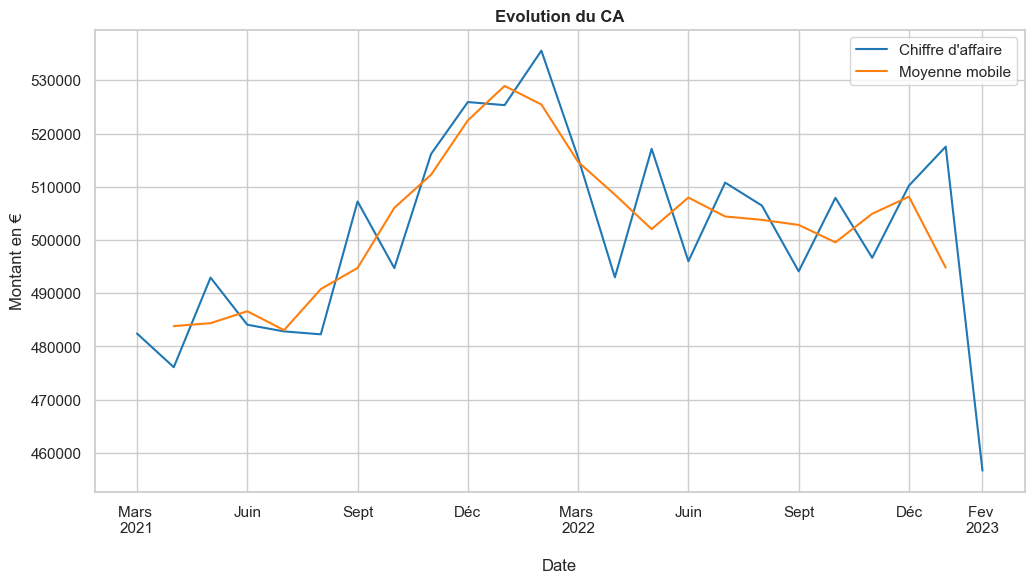

In [84]:
# Visualisation de l'évolution dans le temps avec moyenne mobile

plt.figure( figsize = ( 12, 6))

sns.set_theme(style='whitegrid') 
colors = sns.color_palette('tab10') 
my_palette ={'CA': colors[0], 'moyenne_mobile': colors[1]}
sns.lineplot( x = 'mois_annee',
             y = 'CA',
             data = dfCA, color = colors[0],
             label = "Chiffre d'affaire")
  

sns.lineplot( x = 'mois_annee',
             y = 'moyenne_mobile',
             data = dfCA, color =colors[1],
             label = 'Moyenne mobile')

plt.xticks(['2021-03','2021-06', '2021-09','2021-12','2022-03','2022-06','2022-09','2022-12','2023-02'],
           ['Mars \n2021', 'Juin', 'Sept','Déc','Mars \n2022','Juin','Sept','Déc','Fev \n2023'])

plt.title('Evolution du CA', fontweight='bold')
plt.xlabel('\nDate')  
plt.ylabel('Montant en €')


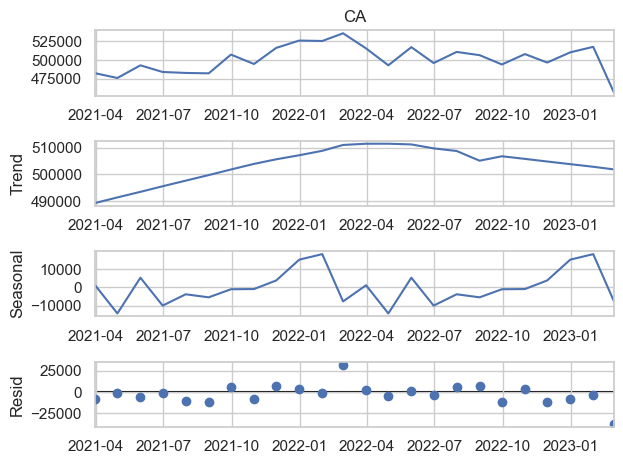

<Figure size 1200x900 with 0 Axes>

In [358]:
# décomposition du CA avec moyenne mobile

CA = pd.Series(dfCA['CA']).copy()

decomp_CA = seasonal_decompose(CA, model='additive', two_sided=True, extrapolate_trend = 1)
decomp_CA.plot()
plt.figure(figsize = (12, 9), constrained_layout = True)
plt.show()

In [354]:
# Affichage de la moyenne mobile avec extrapolation

print(decomp_CA.trend)

date_de_vente
2021-03-31    489371.895833
2021-04-30    491451.294167
2021-05-31    493530.692500
2021-06-30    495610.090833
2021-07-31    497689.489167
2021-08-31    499768.887500
2021-09-30    501848.285833
2021-10-31    503927.684167
2021-11-30    505639.299583
2021-12-31    507144.161667
2022-01-31    508805.631667
2022-02-28    510977.723333
2022-03-31    511438.403750
2022-04-30    511440.839583
2022-05-31    511177.582083
2022-06-30    509710.891667
2022-07-31    508731.882500
2022-08-31    505119.791667
2022-09-30    506773.864167
2022-10-31    505794.855000
2022-11-30    504815.845833
2022-12-31    503836.836667
2023-01-31    502857.827500
2023-02-28    501878.818333
Freq: M, Name: trend, dtype: float64


In [355]:
# Affichage de la saisonnalité 

print(decomp_CA.seasonal)

date_de_vente
2021-03-31    1.002088
2021-04-30    0.971443
2021-05-31    1.010515
2021-06-30    0.980069
2021-07-31    0.992283
2021-08-31    0.989015
2021-09-30    0.998103
2021-10-31    0.998197
2021-11-30    1.007608
2021-12-31    1.030231
2022-01-31    1.036267
2022-02-28    0.984183
2022-03-31    1.002088
2022-04-30    0.971443
2022-05-31    1.010515
2022-06-30    0.980069
2022-07-31    0.992283
2022-08-31    0.989015
2022-09-30    0.998103
2022-10-31    0.998197
2022-11-30    1.007608
2022-12-31    1.030231
2023-01-31    1.036267
2023-02-28    0.984183
Freq: M, Name: seasonal, dtype: float64


In [356]:
# Affichage des erreurs

print(decomp_CA.resid)

date_de_vente
2021-03-31    0.983783
2021-04-30    0.997261
2021-05-31    0.988417
2021-06-30    0.996617
2021-07-31    0.977699
2021-08-31    0.975735
2021-09-30    1.012666
2021-10-31    0.983528
2021-11-30    1.013114
2021-12-31    1.006587
2022-01-31    0.996360
2022-02-28    1.064975
2022-03-31    1.005757
2022-04-30    0.992278
2022-05-31    1.001123
2022-06-30    0.992923
2022-07-31    1.011840
2022-08-31    1.013805
2022-09-30    0.976873
2022-10-31    1.006011
2022-11-30    0.976425
2022-12-31    0.982952
2023-01-31    0.993179
2023-02-28    0.924564
Freq: M, Name: resid, dtype: float64


In [357]:
# Calcul manuel sur 4 mois pour comparer 

CA

date_de_vente
2021-03-31    482440.61
2021-04-30    476109.30
2021-05-31    492943.47
2021-06-30    484088.56
2021-07-31    482835.40
2021-08-31    482284.79
2021-09-30    507240.68
2021-10-31    494733.16
2021-11-30    516167.73
2021-12-31    525917.28
2022-01-31    525338.99
2022-02-28    535571.50
2022-03-31    515456.53
2022-04-30    492998.94
2022-05-31    517132.60
2022-06-30    496016.12
2022-07-31    510783.12
2022-08-31    506467.27
2022-09-30    494114.53
2022-10-31    507917.77
2022-11-30    496664.94
2022-12-31    510219.50
2023-01-31    517540.55
2023-02-28    456679.76
Freq: M, Name: CA, dtype: float64

In [324]:
decomposition_CA = pd.DataFrame(sCA, index = sCA.index, columns = ['prix'])
decomposition_CA.rename(columns = {'prix':'CA'}, inplace=True)

In [325]:
decomposition_CA

,CA
date_de_vente,
2021-03-31,482440.61
2021-04-30,476109.30
2021-05-31,492943.47
2021-06-30,484088.56
2021-07-31,482835.40
2021-08-31,482284.79
2021-09-30,507240.68
2021-10-31,494733.16
2021-11-30,516167.73


In [326]:
decomposition_CA['MM1'] = decomposition_CA['CA'].rolling(window = 4, center=True).mean()

In [327]:
decomposition_CA

,CA,MM1
date_de_vente,,
2021-03-31,482440.61,NaN
2021-04-30,476109.30,NaN
2021-05-31,492943.47,483895.4850
2021-06-30,484088.56,483994.1825
2021-07-31,482835.40,485538.0550
2021-08-31,482284.79,489112.3575
2021-09-30,507240.68,491773.5075
2021-10-31,494733.16,500106.5900
2021-11-30,516167.73,511014.7125


In [334]:
decomposition_CA['MMC'] = ''

In [335]:
arr = decomposition_CA['MM1']
window_size = 2
  
i = -1

moving_averages = [] 
   
while i < len(arr) - window_size + 1: 
    
    window = arr[i : i + window_size] 
    window_average = round(sum(window) / window_size, 2) 
    moving_averages.append(window_average) 
    i += 1
  
print(moving_averages)

[0.0, nan, nan, 483944.83, 484766.12, 487325.21, 490442.93, 495940.05, 505560.65, 513277.0, 520644.08, 525659.97, 521456.28, 516315.69, 510345.47, 504816.87, 505916.24, 504722.52, 503332.97, 503055.9, 501760.16, 505157.44, 501680.94, nan]


In [336]:
del(moving_averages[0])

In [337]:
moving_averages.append('NaN')

In [338]:
len(moving_averages)

24

In [339]:
decomposition_CA['MMC'] = pd.Series(moving_averages, index = decomposition_CA.index)
decomposition_CA['MMC'] = decomposition_CA['MMC'].astype(float)
decomposition_CA

,CA,MM1,MMC
date_de_vente,,,
2021-03-31,482440.61,NaN,NaN
2021-04-30,476109.30,NaN,NaN
2021-05-31,492943.47,483895.4850,483944.83
2021-06-30,484088.56,483994.1825,484766.12
2021-07-31,482835.40,485538.0550,487325.21
2021-08-31,482284.79,489112.3575,490442.93
2021-09-30,507240.68,491773.5075,495940.05
2021-10-31,494733.16,500106.5900,505560.65
2021-11-30,516167.73,511014.7125,513277.00


In [340]:
decomposition_CA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-03-31 to 2023-02-28
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CA      24 non-null     float64
 1   MM1     21 non-null     float64
 2   MMC     20 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


Text(0, 0.5, 'Montant en €')

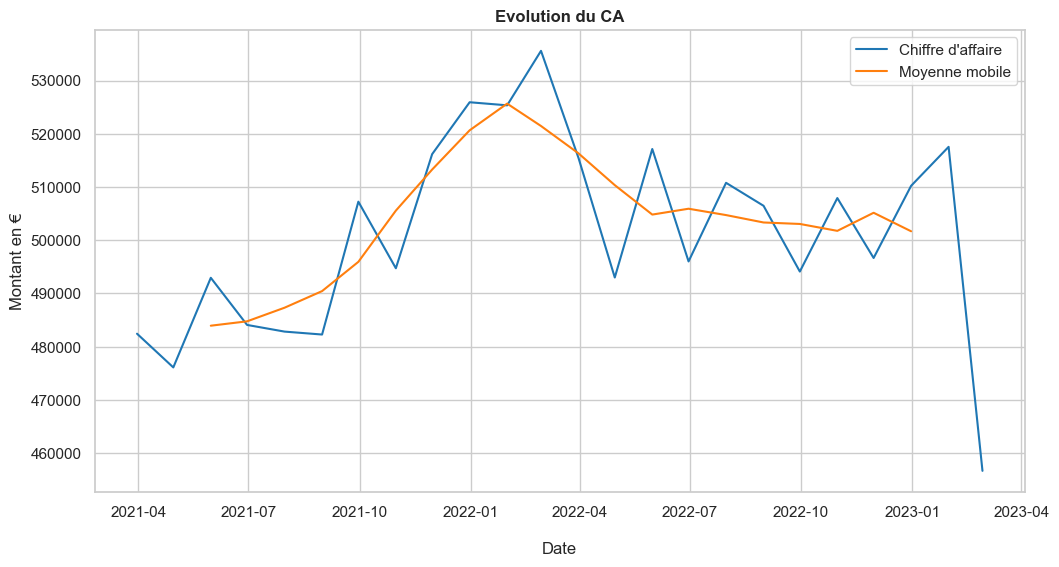

In [341]:
# Affichage de la moyenne mobile centrée

plt.figure( figsize = ( 12, 6))

sns.set_theme(style='whitegrid') 
colors = sns.color_palette('tab10') 
my_palette ={'CA': colors[0], 'MMC': colors[1]}
sns.lineplot( x = 'date_de_vente',
             y = 'CA',
             data = decomposition_CA, color = colors[0],
             label = "Chiffre d'affaire")
  

sns.lineplot( x = 'date_de_vente',
             y = 'MMC',
             data = decomposition_CA, color =colors[1],
             label = 'Moyenne mobile')


plt.title('Evolution du CA', fontweight='bold')
plt.xlabel('\nDate')  
plt.ylabel('Montant en €')


In [342]:
decomposition_CA

,CA,MM1,MMC
date_de_vente,,,
2021-03-31,482440.61,NaN,NaN
2021-04-30,476109.30,NaN,NaN
2021-05-31,492943.47,483895.4850,483944.83
2021-06-30,484088.56,483994.1825,484766.12
2021-07-31,482835.40,485538.0550,487325.21
2021-08-31,482284.79,489112.3575,490442.93
2021-09-30,507240.68,491773.5075,495940.05
2021-10-31,494733.16,500106.5900,505560.65
2021-11-30,516167.73,511014.7125,513277.00


In [343]:
# Calcul des coefficients saisonniers

decomposition_CA['Coeff_saison'] = decomposition_CA['CA']/decomposition_CA['MMC']
decomposition_CA

,CA,MM1,MMC,Coeff_saison
date_de_vente,,,,
2021-03-31,482440.61,NaN,NaN,NaN
2021-04-30,476109.30,NaN,NaN,NaN
2021-05-31,492943.47,483895.4850,483944.83,1.018594
2021-06-30,484088.56,483994.1825,484766.12,0.998602
2021-07-31,482835.40,485538.0550,487325.21,0.990787
2021-08-31,482284.79,489112.3575,490442.93,0.983366
2021-09-30,507240.68,491773.5075,495940.05,1.022786
2021-10-31,494733.16,500106.5900,505560.65,0.978583
2021-11-30,516167.73,511014.7125,513277.00,1.005632


In [344]:
# Calcul des coeffs saisonniers moyens

jan = 0.999389
fev = 1.027069
mars = 0.998336
avr = 0.966010
mai = (1.018594 + 1.024396)/2
juin = (0.980431 + 0.998602)/2
juil = (1.012008 + 0.990787)/2
aout = (1.006227 + 0.983366)/2
sept = (1.022786 + 0.982226)/2
octo = (1.012272 + 0.978583)/2
nov = (0.983188 + 1.005632)/2
dec = (1.017020	 + 1.010128)/2

somme = jan+fev+mars+avr+mai+juin+juil+aout+sept+octo+nov+dec

print(somme)

12.003927


In [345]:
# Ajustement (avec manque de données)

variables = jan, fev, mars, avr, mai, juin, juil, aout, sept, octo, nov, dec

for var in variables :
    var = (var*12)/12.003927

print(sum(variables))

12.003927


In [346]:
# Ajustement manuel 

jan = 0.999062319
fev = 1.026732735
mars = 0.998009273
avr = 0.965694095
mai = 1.021161103
juin = 0.989192988
juil = 1.001069607
aout = 0.994470886
sept = 1.00217802
octo = 0.995101861
nov = 0.994084742
dec = 1.013242371

somme = jan+fev+mars+avr+mai+juin+juil+aout+sept+octo+nov+dec
print(somme)

12.000000000000002


In [347]:
print(variables)

(0.999389, 1.027069, 0.998336, 0.96601, 1.021495, 0.9895165, 1.0013975, 0.9947965, 1.002506, 0.9954275, 0.99441, 1.013574)


In [348]:
# Ajout des coeffs saisonniers moyens ajustés

coeffs_moyens = mars, avr, mai, juin, juil, aout, sept, octo, nov, dec, jan, fev, mars, avr, mai, juin, juil, aout, sept, octo, nov, dec, jan, fev 

decomposition_CA['Coeff_saison_moyens'] = coeffs_moyens

In [349]:
# Affichage du df et retrait des 2 premières et dernières lignes

decomposition_CA.drop(['2021-03-31','2021-04-30', '2023-01-31','2023-02-28'], axis=0, inplace=True)
decomposition_CA

,CA,MM1,MMC,Coeff_saison,Coeff_saison_moyens
date_de_vente,,,,,
2021-05-31,492943.47,483895.4850,483944.83,1.018594,1.021161
2021-06-30,484088.56,483994.1825,484766.12,0.998602,0.989193
2021-07-31,482835.40,485538.0550,487325.21,0.990787,1.001070
2021-08-31,482284.79,489112.3575,490442.93,0.983366,0.994471
2021-09-30,507240.68,491773.5075,495940.05,1.022786,1.002178
2021-10-31,494733.16,500106.5900,505560.65,0.978583,0.995102
2021-11-30,516167.73,511014.7125,513277.00,1.005632,0.994085
2021-12-31,525917.28,515539.2900,520644.08,1.010128,1.013242
2022-01-31,525338.99,525748.8750,525659.97,0.999389,0.999062


In [350]:
# Calcul des valeurs désaisonnalisées 

decomposition_CA['VD'] = decomposition_CA['CA']/decomposition_CA['Coeff_saison_moyens']

decomposition_CA

,CA,MM1,MMC,Coeff_saison,Coeff_saison_moyens,VD
date_de_vente,,,,,,
2021-05-31,492943.47,483895.4850,483944.83,1.018594,1.021161,482728.404511
2021-06-30,484088.56,483994.1825,484766.12,0.998602,0.989193,489377.265986
2021-07-31,482835.40,485538.0550,487325.21,0.990787,1.001070,482319.507678
2021-08-31,482284.79,489112.3575,490442.93,0.983366,0.994471,484966.223536
2021-09-30,507240.68,491773.5075,495940.05,1.022786,1.002178,506138.300658
2021-10-31,494733.16,500106.5900,505560.65,0.978583,0.995102,497168.359732
2021-11-30,516167.73,511014.7125,513277.00,1.005632,0.994085,519239.163616
2021-12-31,525917.28,515539.2900,520644.08,1.010128,1.013242,519043.908005
2022-01-31,525338.99,525748.8750,525659.97,0.999389,0.999062,525832.052725


In [351]:
# Calcul des erreurs 

decomposition_CA['Erreurs'] = decomposition_CA['CA']-decomposition_CA['VD']
decomposition_CA

,CA,MM1,MMC,Coeff_saison,Coeff_saison_moyens,VD,Erreurs
date_de_vente,,,,,,,
2021-05-31,492943.47,483895.4850,483944.83,1.018594,1.021161,482728.404511,10215.065489
2021-06-30,484088.56,483994.1825,484766.12,0.998602,0.989193,489377.265986,-5288.705986
2021-07-31,482835.40,485538.0550,487325.21,0.990787,1.001070,482319.507678,515.892322
2021-08-31,482284.79,489112.3575,490442.93,0.983366,0.994471,484966.223536,-2681.433536
2021-09-30,507240.68,491773.5075,495940.05,1.022786,1.002178,506138.300658,1102.379342
2021-10-31,494733.16,500106.5900,505560.65,0.978583,0.995102,497168.359732,-2435.199732
2021-11-30,516167.73,511014.7125,513277.00,1.005632,0.994085,519239.163616,-3071.433616
2021-12-31,525917.28,515539.2900,520644.08,1.010128,1.013242,519043.908005,6873.371995
2022-01-31,525338.99,525748.8750,525659.97,0.999389,0.999062,525832.052725,-493.062725


(array([18809., 18871., 18932., 18993., 19052., 19113., 19174., 19236.,
        19297., 19358.]),
 [Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01')])

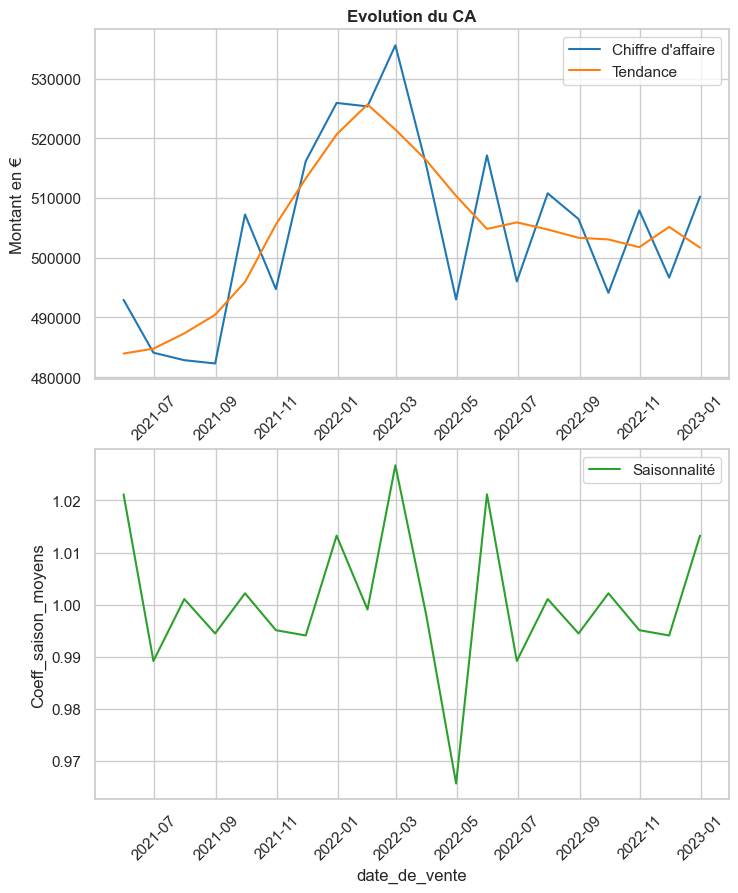

In [352]:
# Graphique de l'ensemble

plt.figure( figsize = ( 18, 10))

sns.set_theme(style='whitegrid') 
colors = sns.color_palette('tab10') 
my_palette ={'CA': colors[0], 'MMC': colors[1], 'VD' : colors[2], 'Erreurs' : [3]}

plt.subplot(2,2,1)
sns.lineplot( x = 'date_de_vente',
             y = 'CA',
             data = decomposition_CA, color = colors[0],
             label = "Chiffre d'affaire")
  
sns.lineplot( x = 'date_de_vente',
             y = 'MMC',
             data = decomposition_CA, color =colors[1],
             label = 'Tendance')


plt.title('Evolution du CA', fontweight='bold')
plt.xlabel('\nDate')  
plt.ylabel('Montant en €')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.lineplot( x = 'date_de_vente',
             y = 'Coeff_saison_moyens',
             data = decomposition_CA, color =colors[2],
             label = 'Saisonnalité')

plt.xticks(rotation=45)

(array([18809., 18871., 18932., 18993., 19052., 19113., 19174., 19236.,
        19297., 19358.]),
 [Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01')])

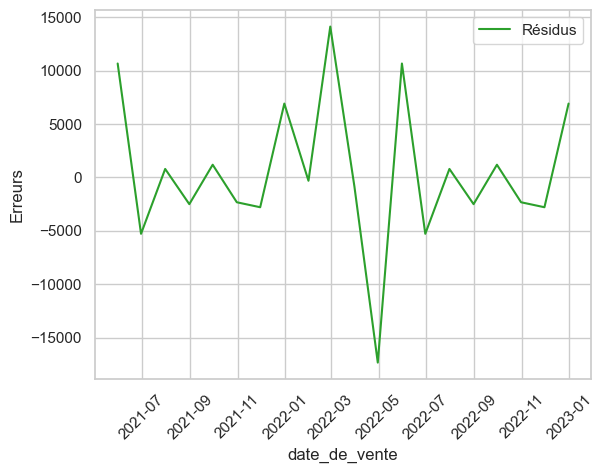

In [110]:
sns.lineplot( x = 'date_de_vente',
             y = 'Erreurs',
             data = decomposition_CA, color =colors[2],
             label = 'Résidus')

plt.xticks(rotation=45)

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.3 - Répartition du CA </h3>

In [111]:
# Affichage des données

df3

,date_de_vente,prix,categorie
0,2021-03-01 00:01:07,11.99,0
1,2022-10-01 00:01:07,11.99,0
2,2022-12-01 00:01:07,11.99,0
3,2023-01-01 00:01:07,11.99,0
4,2021-11-23 18:21:56,18.99,1
...,...,...,...
687529,2022-08-28 16:51:07,68.99,2
687530,2022-10-28 16:51:07,68.99,2
687531,2021-12-18 20:54:25,19.81,1
687532,2022-10-18 20:54:25,19.81,1


In [112]:
# Ajout des colonnes catégories et mois_annee

dfCAT = df3.copy()
dfCAT['categorie_0'] = dfCAT.loc[dfCAT['categorie'] == 0,['prix']]
dfCAT['categorie_1'] = dfCAT.loc[dfCAT['categorie'] == 1,['prix']]
dfCAT['categorie_2'] = dfCAT.loc[dfCAT['categorie'] == 2,['prix']]
dfCAT['mois_annee'] = dfCAT['date_de_vente'].dt.strftime('%Y-%m')
dfCAT

,date_de_vente,prix,categorie,categorie_0,categorie_1,categorie_2,mois_annee
0,2021-03-01 00:01:07,11.99,0,11.99,NaN,NaN,2021-03
1,2022-10-01 00:01:07,11.99,0,11.99,NaN,NaN,2022-10
2,2022-12-01 00:01:07,11.99,0,11.99,NaN,NaN,2022-12
3,2023-01-01 00:01:07,11.99,0,11.99,NaN,NaN,2023-01
4,2021-11-23 18:21:56,18.99,1,NaN,18.99,NaN,2021-11
...,...,...,...,...,...,...,...
687529,2022-08-28 16:51:07,68.99,2,NaN,NaN,68.99,2022-08
687530,2022-10-28 16:51:07,68.99,2,NaN,NaN,68.99,2022-10
687531,2021-12-18 20:54:25,19.81,1,NaN,19.81,NaN,2021-12
687532,2022-10-18 20:54:25,19.81,1,NaN,19.81,NaN,2022-10


In [113]:
# Suppression colonnes inutiles / verif types de données

dfCAT = dfCAT.drop(columns={'date_de_vente', 'prix','categorie'})
dfCAT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   categorie_0  415459 non-null  float64
 1   categorie_1  235592 non-null  float64
 2   categorie_2  36483 non-null   float64
 3   mois_annee   687534 non-null  object 
dtypes: float64(3), object(1)
memory usage: 26.2+ MB


In [114]:
# Calcul des CA par catégorie / mois

dfCAT = dfCAT.groupby(['mois_annee'])[['categorie_0','categorie_1','categorie_2']].sum().reset_index()
dfCAT

,mois_annee,categorie_0,categorie_1,categorie_2
0,2021-03,193629.17,186974.17,101837.27
1,2021-04,205222.46,156138.35,114748.49
2,2021-05,196186.72,165893.40,130863.35
3,2021-06,167943.15,189162.04,126983.37
4,2021-07,144750.79,188523.27,149561.34
5,2021-08,167737.62,162991.38,151555.79
6,2021-09,246353.91,190613.78,70272.99
7,2021-10,199250.83,207696.74,87785.59
8,2021-11,155909.56,252910.39,107347.78
9,2021-12,206036.24,251026.75,68854.29


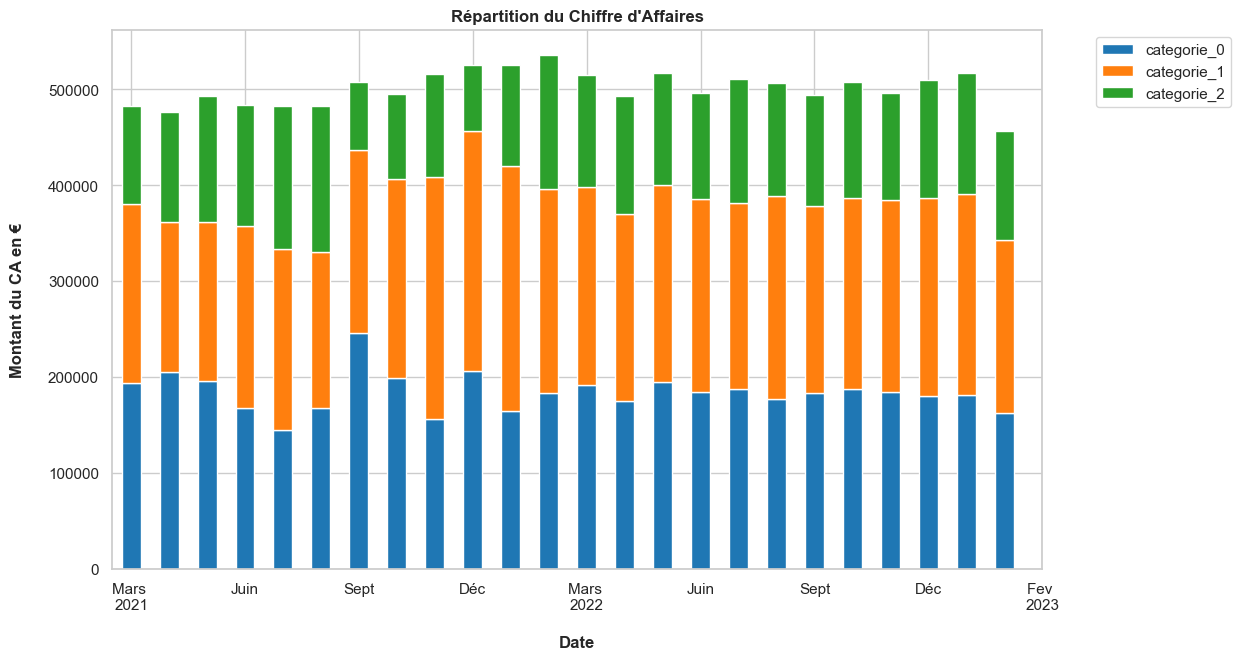

In [115]:
# Visualisation de la répartition du CA / mois / catégorie

colors = sns.color_palette('tab10')
my_palette ={'categorie_0': colors[0], 'categorie_1': colors[1], 'categorie_2':colors[2]} 


dfCAT.plot(kind='bar', stacked=True, color=my_palette, rot=0, figsize = (12, 7))

plt.xlabel('\nDate', fontweight= 'bold')
plt.ylabel('Montant du CA en €\n', fontweight= 'bold')
plt.title("Répartition du Chiffre d'Affaires", fontweight= 'bold')


plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24],
           ['Mars \n2021', 'Juin', 'Sept','Déc','Mars \n2022','Juin','Sept','Déc','Fev \n2023'])

plt.legend(bbox_to_anchor=(1.05, 1))

In [116]:
print(dfCAT['categorie_0'].sum())

4419730.970000001


In [117]:
print(dfCAT['categorie_1'].sum())

4827657.11


In [118]:
print(dfCAT['categorie_2'].sum())

2780275.02


In [119]:
CA_total

12027663.1

 <div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.4 - Diagramme de Pareto </h3>

In [120]:
from matplotlib.ticker import PercentFormatter

In [121]:
df_pareto = df2[['id_produit','prix','categorie']].copy()
df_pareto

,id_produit,prix,categorie
0,0_1259,11.99,0
1,0_1259,11.99,0
2,0_1259,11.99,0
3,0_1259,11.99,0
4,1_397,18.99,1
...,...,...,...
687529,2_163,68.99,2
687530,2_163,68.99,2
687531,1_64,19.81,1
687532,1_64,19.81,1


In [122]:
df_pareto = df_pareto.groupby('categorie').agg(
    nb_ventes=('id_produit','count'), CA_produit=('prix', 'sum')).reset_index()
df_pareto

,categorie,nb_ventes,CA_produit
0,0,415459,4419730.97
1,1,235592,4827657.11
2,2,36483,2780275.02


In [123]:
df_pareto = df_pareto.sort_values('CA_produit', ascending=False).reset_index(drop=True)
df_pareto

,categorie,nb_ventes,CA_produit
0,1,235592,4827657.11
1,0,415459,4419730.97
2,2,36483,2780275.02


In [124]:
# Ajout colonne categorie_livre

def set_values2(row, value):
    return value[row]
   
map_dictionary2 ={0:'Categorie_0', 1:'Categorie_1', 2:'Categorie_2'} 
   
df_pareto['categorie_livre'] = df_pareto['categorie'].apply(set_values2, args =(map_dictionary2, )) 
df_pareto

,categorie,nb_ventes,CA_produit,categorie_livre
0,1,235592,4827657.11,Categorie_1
1,0,415459,4419730.97,Categorie_0
2,2,36483,2780275.02,Categorie_2


In [125]:
df_pareto = df_pareto.set_index('categorie_livre')
df_pareto

,categorie,nb_ventes,CA_produit
categorie_livre,,,
Categorie_1,1,235592,4827657.11
Categorie_0,0,415459,4419730.97
Categorie_2,2,36483,2780275.02


In [126]:
# Ajout de la colonne de pourcentages cumulés

df_pareto['pourc_cum'] = round(df_pareto['CA_produit'].cumsum()/df_pareto['CA_produit'].sum()*100,2)
df_pareto

,categorie,nb_ventes,CA_produit,pourc_cum
categorie_livre,,,,
Categorie_1,1,235592,4827657.11,40.14
Categorie_0,0,415459,4419730.97,76.88
Categorie_2,2,36483,2780275.02,100.00


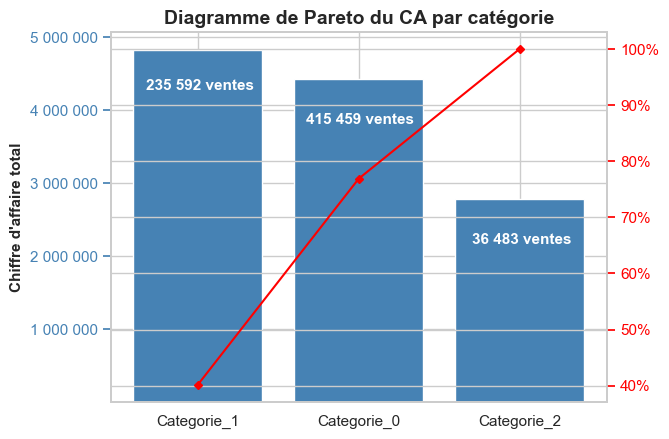

In [127]:
# Définition des paramètres
sns.set_theme(style='whitegrid') 
color1 = 'steelblue'
color2 = 'red'
line_size = 4

# Diagramme 
fig, ax = plt.subplots()
ax.bar(df_pareto.index, df_pareto['CA_produit'], color=color1)
plt.figtext(0.18, 0.76, '235 592 ventes', fontweight = 'bold', fontsize = 11, color = 'white')
plt.figtext(0.43, 0.69, '415 459 ventes', fontweight = 'bold', fontsize = 11, color = 'white')
plt.figtext(0.69, 0.44, '36 483 ventes', fontweight = 'bold', fontsize = 11, color = 'white')
plt.ylabel("Chiffre d'affaire total", fontweight = 'bold', fontsize = 11)
plt.title("Diagramme de Pareto du CA par catégorie", fontweight = 'bold', fontsize = 14)

# Ajout des pourcentages cumulés
ax2 = ax.twinx()
ax2.plot(df_pareto.index, df_pareto['pourc_cum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Ajout de paramètres 
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax.set_yticks([1e6,2e6,3e6,4e6,5e6],
           ['1 000 000', '2 000 000', '3 000 000','4 000 000','5 000 000'])

# Affichage
plt.show()

 <div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.5 - Top 10 des références depuis l'ouverture</h3>

In [128]:
# Récupération des infos nécessaires

df_ref = df2[['id_produit','categorie','id_vente','prix']]
df_ref

,id_produit,categorie,id_vente,prix
0,0_1259,0,0,11.99
1,0_1259,0,546905,11.99
2,0_1259,0,604432,11.99
3,0_1259,0,633051,11.99
4,1_397,1,247385,18.99
...,...,...,...,...
687529,2_163,2,515436,68.99
687530,2_163,2,572934,68.99
687531,1_64,1,272332,19.81
687532,1_64,1,563399,19.81


In [129]:
# Vérification

df2.describe()

,id_vente,prix,categorie,age
count,687534.000000,687534.000000,687534.000000,687534.000000
mean,343766.500000,17.493918,0.448789,45.182609
std,198474.114326,18.238337,0.594563,13.607935
min,0.000000,0.620000,0.000000,19.000000
25%,171883.250000,8.990000,0.000000,36.000000
50%,343766.500000,13.990000,0.000000,43.000000
75%,515649.750000,19.080000,1.000000,53.000000
max,687533.000000,300.000000,2.000000,94.000000


In [130]:
# Calcul du nombre des ventes

id_produit = df2['id_produit']
effectifs = id_produit.value_counts()
modalites = effectifs.index
effectifs.head()

1_369    2340
1_417    2269
1_414    2246
1_498    2202
1_425    2163
Name: id_produit, dtype: int64

In [131]:
# Création d'un dataframe 

df_ref = pd.DataFrame(modalites, columns = ['id_produit'])
df_ref.head()

,id_produit
0,1_369
1,1_417
2,1_414
3,1_498
4,1_425


In [132]:
# Ajout des ventes dans le DF

df_ref['total_ventes'] = effectifs.values
df_ref.head()

,id_produit,total_ventes
0,1_369,2340
1,1_417,2269
2,1_414,2246
3,1_498,2202
4,1_425,2163


In [133]:
# Calcul des CA par produit

df_ref2 = df2.groupby(['id_produit','categorie'])['prix'].sum().reset_index()
df_ref2

,id_produit,categorie,prix
0,0_0,0,4657.50
1,0_1,0,5352.13
2,0_10,0,394.90
3,0_100,0,61.80
4,0_1000,0,2954.88
...,...,...,...
3260,2_95,2,395.96
3261,2_96,2,28650.18
3262,2_97,2,2092.87
3263,2_98,2,149.74


In [134]:
# Affichage des infos

df_ref2.describe()

,categorie,prix
count,3265.000000,3265.000000
mean,0.370291,3683.817182
std,0.614699,7502.222605
min,0.000000,0.990000
25%,0.000000,233.870000
50%,0.000000,810.980000
75%,1.000000,3458.000000
max,2.000000,94893.500000


In [135]:
# Calcul des CA par ref

df_ref3 = df_ref2.merge(df_ref, on='id_produit', how='inner')
df_ref3.rename(columns = {'prix':'CA_total_ref'}, inplace=True)
df_ref3

,id_produit,categorie,CA_total_ref,total_ventes
0,0_0,0,4657.50,1242
1,0_1,0,5352.13,487
2,0_10,0,394.90,22
3,0_100,0,61.80,3
4,0_1000,0,2954.88,432
...,...,...,...,...
3260,2_95,2,395.96,4
3261,2_96,2,28650.18,598
3262,2_97,2,2092.87,13
3263,2_98,2,149.74,1


In [136]:
# Vérification

df_ref3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3265 entries, 0 to 3264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_produit    3265 non-null   object 
 1   categorie     3265 non-null   int64  
 2   CA_total_ref  3265 non-null   float64
 3   total_ventes  3265 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 127.5+ KB


In [137]:
# Vérification

CA_total = sum(df_ref3['CA_total_ref'])
print("Le chiffre d'affaires total est de {:,} € ".format(round(CA_total)))

Le chiffre d'affaires total est de 12,027,663 € 


In [138]:
# Affichage du top 10 des plus vendus depuis l'ouverture

df_ref3.sort_values('total_ventes',ascending=False).head(10)

,id_produit,categorie,CA_total_ref,total_ventes
2591,1_369,1,56136.60,2340
2644,1_417,1,47626.31,2269
2641,1_414,1,53522.18,2246
2733,1_498,1,51460.74,2202
2653,1_425,1,36749.37,2163
2629,1_403,1,36699.60,2040
2640,1_413,1,36627.64,2036
2639,1_412,1,33533.10,2014
2632,1_406,1,49694.43,2003
2633,1_407,1,31995.99,2001


In [139]:
# Affichage du top 10 des plus rentables (CA) depuis l'ouverture

df_ref3.sort_values('CA_total_ref',ascending=False).head(10)

,id_produit,categorie,CA_total_ref,total_ventes
3096,2_159,2,94893.50,650
3070,2_135,2,69334.95,1005
3045,2_112,2,65407.76,968
3034,2_102,2,60736.78,1027
3152,2_209,2,56971.86,814
2619,1_395,1,56617.47,1953
2591,1_369,1,56136.60,2340
3043,2_110,2,53846.25,865
2607,1_383,1,53834.43,1857
2641,1_414,1,53522.18,2246


In [140]:
# Recherche des flops (vendus 0 fois)

liste_ref_vendues1 = list(pd.unique(df_ref3['id_produit']))

In [141]:
# Recherche des références non vendues 

liste_refs = list(pd.unique(fichier_produits['id_produit']))
liste_ref_pas_vendues = list()

for element in liste_refs:
    if element not in liste_ref_vendues1:
        liste_ref_pas_vendues.append(element)
        
print(liste_ref_pas_vendues)

['0_1016', '0_1780', '0_1062', '0_1119', '0_1014', '1_0', '0_1318', '0_1800', '0_1645', '0_322', '0_1620', '0_1025', '2_87', '1_394', '2_72', '0_310', '0_1624', '2_86', '0_299', '0_510', '0_2308']


In [142]:
# Affichage des flops avec prix et categorie

df_flops = pd.DataFrame(liste_ref_pas_vendues, columns = ['id_produit'])
df_flops = df_flops.merge(fichier_produits, on='id_produit', how='inner')
df_flops

,id_produit,prix,categorie
0,0_1016,35.06,0
1,0_1780,1.67,0
2,0_1062,20.08,0
3,0_1119,2.99,0
4,0_1014,1.15,0
5,1_0,31.82,1
6,0_1318,20.92,0
7,0_1800,22.05,0
8,0_1645,2.99,0
9,0_322,2.99,0


Ces références n'ont jamais été vendues depuis l'ouverture de la librairie en ligne. Pour certaines, le prix a l'air d'en être la cause. Il serait bon de creuser plus pour comprendre pourquoi. 

 <div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.6 - Top 10 des références sur les 12 derniers mois (mars 2022 à février 2023) </h3>

In [143]:
# Récupération des infos nécessaires

df_ref23= df2[['id_produit','categorie','id_vente','prix','date_de_vente']].copy()
df_ref23['mois_annee'] = df_ref23['date_de_vente'].dt.strftime('%Y-%m')
df_ref_23= df_ref23.loc[(df_ref23['mois_annee'] >= '2022-03' ) & (df_ref23['mois_annee'] <= '2023-02'),:]
df_ref_23

,id_produit,categorie,id_vente,prix,date_de_vente,mois_annee
1,0_1259,0,546905,11.99,2022-10-01 00:01:07,2022-10
2,0_1259,0,604432,11.99,2022-12-01 00:01:07,2022-12
3,0_1259,0,633051,11.99,2023-01-01 00:01:07,2023-01
5,1_397,1,396114,18.99,2022-04-23 18:21:56,2022-04
7,0_1140,0,590404,3.73,2022-11-16 10:01:30,2022-11
...,...,...,...,...,...,...
687525,2_147,2,522260,181.99,2022-09-05 00:31:15,2022-09
687527,1_607,1,368802,26.99,2022-03-25 07:26:00,2022-03
687529,2_163,2,515436,68.99,2022-08-28 16:51:07,2022-08
687530,2_163,2,572934,68.99,2022-10-28 16:51:07,2022-10


In [144]:
# Vérification

df_ref_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341926 entries, 1 to 687532
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id_produit     341926 non-null  object        
 1   categorie      341926 non-null  int64         
 2   id_vente       341926 non-null  int64         
 3   prix           341926 non-null  float64       
 4   date_de_vente  341926 non-null  datetime64[ns]
 5   mois_annee     341926 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 18.3+ MB


In [145]:
# Comptage du nombre de références vendues

df_ref_23['id_produit'].unique().shape[0]

3220

In [146]:
# Calcul du nombre des ventes

id_produit = df_ref_23['id_produit']
effectifs = id_produit.value_counts()
modalites = effectifs.index
effectifs.head()

1_369    1171
1_414    1153
1_417    1127
1_498    1092
1_425    1083
Name: id_produit, dtype: int64

In [147]:
# Création d'un dataframe 

df_temp_2023 = pd.DataFrame(modalites, columns = ['id_produit'])
df_temp_2023.head()

,id_produit
0,1_369
1,1_414
2,1_417
3,1_498
4,1_425


In [148]:
# Ajout des ventes dans le DF

df_temp_2023['total_ventes'] = effectifs.values
df_temp_2023.head()

,id_produit,total_ventes
0,1_369,1171
1,1_414,1153
2,1_417,1127
3,1_498,1092
4,1_425,1083


In [149]:
# Calcul des CA par ref

df_ref_2023 = df_ref_23.groupby(['id_produit','categorie'])['prix'].sum().reset_index()
df_ref_2023.rename(columns = {'prix':'CA'}, inplace=True)
df_ref_2023

,id_produit,categorie,CA
0,0_0,0,2366.25
1,0_1,0,2615.62
2,0_10,0,179.50
3,0_100,0,20.60
4,0_1000,0,1436.40
...,...,...,...
3215,2_94,2,436.35
3216,2_95,2,98.99
3217,2_96,2,15187.47
3218,2_97,2,1287.92


In [150]:
# Calcul des CA par ref

df_ref_22_23 = df_ref_2023.merge(df_temp_2023, on='id_produit', how='inner')
df_ref_22_23

,id_produit,categorie,CA,total_ventes
0,0_0,0,2366.25,631
1,0_1,0,2615.62,238
2,0_10,0,179.50,10
3,0_100,0,20.60,1
4,0_1000,0,1436.40,210
...,...,...,...,...
3215,2_94,2,436.35,3
3216,2_95,2,98.99,1
3217,2_96,2,15187.47,317
3218,2_97,2,1287.92,8


In [151]:
# Affichage du top 10 CA 2022/2023

top10CA = df_ref_22_23.sort_values('CA',ascending=False).head(10)
top10CA

,id_produit,categorie,CA,total_ventes
3056,2_159,2,49344.62,338
3030,2_135,2,35460.86,514
3006,2_112,2,33447.15,495
2995,2_102,2,31817.32,538
3112,2_209,2,29675.76,424
2582,1_395,1,28526.16,984
2554,1_369,1,28092.29,1171
3160,2_39,2,27835.20,480
2604,1_414,1,27475.99,1153
3064,2_166,2,26914.68,117


In [152]:
# Affichage du top 10 ventes 2022/2023

df_ref_22_23.sort_values('total_ventes',ascending=False).head(10)

,id_produit,categorie,CA,total_ventes
2554,1_369,1,28092.29,1171
2604,1_414,1,27475.99,1153
2607,1_417,1,23655.73,1127
2695,1_498,1,25520.04,1092
2615,1_425,1,18400.17,1083
2592,1_403,1,18367.79,1021
2602,1_412,1,16983.00,1020
2596,1_407,1,16021.98,1002
2603,1_413,1,18007.99,1001
2595,1_406,1,24636.33,993


In [153]:
# Calcul du CA total de la période 

data_22_23 = df2.loc[(df2['date_de_vente'] >= '2022-03-03' ) & (df2['date_de_vente'] <= '2023-02-28'),:]
CA_22_23 = round(sum(data_22_23['prix']),2)
Top_10 = sum(top10CA['CA'].iloc[:10])
part_du_CA = round((Top_10/CA_22_23)*100)

print("Le chiffre d'affaires total des 12 dernies mois est de {:,} € ".format(CA_22_23))
print("Le Top 10 des CA représente {} % du CA total de la période" .format(part_du_CA))
print("Le total des CA du top 10 est de {} €" .format(Top_10))

Le chiffre d'affaires total des 12 dernies mois est de 5,967,402.94 € 
Le Top 10 des CA représente 5 % du CA total de la période
Le total des CA du top 10 est de 318590.03 €


In [154]:
# Création d'une liste des références vendues sur la période 2022/2023

liste_ref_vendues = list(pd.unique(df_ref_2023['id_produit']))

In [155]:
# Recherche des références non vendues sur la période 2022/2023

liste_toutes_refs = list(pd.unique(df2['id_produit']))
liste_ref_non_vendues = list()

for element in liste_toutes_refs:
    if element not in liste_ref_vendues:
        liste_ref_non_vendues.append(element)
        
print(liste_ref_non_vendues)

['0_88', '0_1770', '0_889', '1_514', '0_43', '0_1871', '0_1533', '0_620', '0_1535', '0_1806', '0_2201', '2_122', '2_66', '0_898', '0_1595', '1_243', '0_541', '0_324', '0_2263', '0_2257', '0_1728', '0_247', '0_980', '0_1675', '0_1171', '0_1539', '0_1215', '0_1902', '0_886', '0_549', '0_1498', '0_833', '1_420', '0_1601', '2_78', '0_1759', '0_807', '0_1284', '0_1683', '0_1151', '2_23', '0_1379', '0_1633', '2_81', '2_98']


In [156]:
# Affichage des flops sur la période (en CA et en nombre de ventes) avec prix + categorie

df_ref_non_vendues = pd.DataFrame(liste_ref_non_vendues, columns = ['id_produit'])
df_5 = df_ref_non_vendues.merge(fichier_produits, on='id_produit', how='inner')
df_5

,id_produit,prix,categorie
0,0_88,8.30,0
1,0_1770,20.70,0
2,0_889,23.99,0
3,1_514,67.66,1
4,0_43,2.99,0
5,0_1871,1.99,0
6,0_1533,27.99,0
7,0_620,25.31,0
8,0_1535,1.99,0
9,0_1806,1.61,0


In [157]:
# Vérification

df_5['id_produit'].unique().shape[0]

45

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.7 - Répartition du CA entre les profils clients : Retrait de certains clients avant analyse </h3>

Liste des clients considérés comme professionnels :

In [158]:
# Client considéré pro #1 : 25 586 livres commandés pour un total de 326 039.89 €

df2.loc[df2['id_client'] == 'c_1609',:]

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie,age,genre
84,0_1259,s_1519,c_1609,2021-03-04 07:26:01,2021-03-04 07:26:01,3116,11.99,0,43,Homme
85,0_1259,s_53058,c_1609,2021-06-24 09:40:37,2021-06-24 09:40:37,106258,11.99,0,43,Homme
86,0_1259,s_53165,c_1609,2021-06-24 14:40:37,2021-06-24 14:40:37,106454,11.99,0,43,Homme
87,0_1259,s_96014,c_1609,2021-09-26 21:30:08,2021-09-26 21:30:08,190726,11.99,0,43,Homme
88,0_1259,s_105418,c_1609,2021-10-16 03:22:15,2021-10-16 03:22:15,212291,11.99,0,43,Homme
...,...,...,...,...,...,...,...,...,...,...
25665,0_460,s_263761,c_1609,2022-09-05 19:08:21,2022-09-05 19:08:21,523054,1.25,0,43,Homme
25666,0_419,s_148619,c_1609,2022-01-12 06:32:43,2022-01-12 06:32:43,297667,20.99,0,43,Homme
25667,0_419,s_325700,c_1609,2023-01-12 06:32:43,2023-01-12 06:32:43,643631,20.99,0,43,Homme
25668,0_419,s_340418,c_1609,2023-02-12 06:32:43,2023-02-12 06:32:43,671965,20.99,0,43,Homme


In [159]:
# Client considéré pro #2 : 5222 livres commandés pour un total de 290 227.03 €

df2.loc[df2['id_client'] == 'c_4958',:]

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie,age,genre
98566,0_1390,s_99014,c_4958,2021-10-02 17:32:58,2021-10-02 17:32:58,197939,19.37,0,24,Homme
98567,1_445,s_3108,c_4958,2021-03-07 17:05:34,2021-03-07 17:05:34,6279,23.99,1,24,Homme
98568,1_445,s_9459,c_4958,2021-03-21 13:18:13,2021-03-21 13:18:13,19079,23.99,1,24,Homme
98569,1_445,s_13480,c_4958,2021-03-30 10:28:18,2021-03-30 10:28:18,27171,23.99,1,24,Homme
98570,1_445,s_27454,c_4958,2021-04-29 13:11:20,2021-04-29 13:11:20,55604,23.99,1,24,Homme
...,...,...,...,...,...,...,...,...,...,...
103783,2_130,s_93974,c_4958,2021-09-22 23:46:27,2021-09-22 23:46:27,185866,142.58,2,24,Homme
103784,2_130,s_183016,c_4958,2022-03-22 23:46:27,2022-03-22 23:46:27,366202,142.58,2,24,Homme
103785,2_130,s_286564,c_4958,2022-10-22 23:46:27,2022-10-22 23:46:27,567708,142.58,2,24,Homme
103786,1_494,s_119195,c_4958,2021-11-13 21:02:17,2021-11-13 21:02:17,238040,49.16,1,24,Homme


In [160]:
# Client considéré pro #3 : 9199 livres commandés pour un total de 153 918.60 €

df2.loc[df2['id_client'] == 'c_6714',:]

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie,age,genre
40893,0_1259,s_109793,c_6714,2021-10-25 05:40:17,2021-10-25 05:40:17,219797,11.99,0,55,Femme
40894,0_1259,s_116625,c_6714,2021-11-08 15:15:33,2021-11-08 15:15:33,233083,11.99,0,55,Femme
40895,0_1259,s_128365,c_6714,2021-12-02 14:57:07,2021-12-02 14:57:07,255823,11.99,0,55,Femme
40896,0_1259,s_138450,c_6714,2021-12-22 22:38:03,2021-12-22 22:38:03,276603,11.99,0,55,Femme
40897,0_1259,s_227802,c_6714,2022-06-22 22:38:03,2022-06-22 22:38:03,453902,11.99,0,55,Femme
...,...,...,...,...,...,...,...,...,...,...
50087,0_975,s_137823,c_6714,2021-12-21 17:24:40,2021-12-21 17:24:40,275303,7.99,0,55,Femme
50088,1_151,s_120924,c_6714,2021-11-17 09:45:30,2021-11-17 09:45:30,241453,41.99,1,55,Femme
50089,1_151,s_195282,c_6714,2022-04-17 09:45:30,2022-04-17 09:45:30,390167,41.99,1,55,Femme
50090,1_151,s_254492,c_6714,2022-08-17 09:45:30,2022-08-17 09:45:30,505389,41.99,1,55,Femme


In [161]:
# Client considéré pro #4 : 6793 livres commandés pour un total de 114 110.57 €

df2.loc[df2['id_client'] == 'c_3454',:]

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie,age,genre
50865,0_1259,s_120835,c_3454,2021-11-17 05:23:16,2021-11-17 05:23:16,241272,11.99,0,54,Homme
50866,0_1259,s_195193,c_3454,2022-04-17 05:23:16,2022-04-17 05:23:16,389986,11.99,0,54,Homme
50867,0_1259,s_254403,c_3454,2022-08-17 05:23:16,2022-08-17 05:23:16,505208,11.99,0,54,Homme
50868,0_1259,s_283645,c_3454,2022-10-17 05:23:16,2022-10-17 05:23:16,561748,11.99,0,54,Homme
50869,0_1390,s_142251,c_3454,2021-12-30 07:53:49,2021-12-30 07:53:49,284748,19.37,0,54,Homme
...,...,...,...,...,...,...,...,...,...,...
57653,0_787,s_326137,c_3454,2023-01-13 04:59:54,2023-01-13 04:59:54,644459,7.99,0,54,Homme
57654,0_95,s_111601,c_3454,2021-10-29 02:42:29,2021-10-29 02:42:29,222907,9.99,0,54,Homme
57655,1_428,s_168833,c_3454,2022-02-21 22:11:18,2022-02-21 22:11:18,338155,39.23,1,54,Homme
57656,1_428,s_227259,c_3454,2022-06-21 22:11:18,2022-06-21 22:11:18,452827,39.23,1,54,Homme


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.8 - Répartition du CA entre les profils clients : analyse selon le genre </h3>

In [162]:
# Récupération des infos nécessaires

df_total_clients = df2.copy()
df_total_clients

,id_produit,id_session,id_client,date_de_vente,date_timestamp,id_vente,prix,categorie,age,genre
0,0_1259,s_1,c_329,2021-03-01 00:01:07,2021-03-01 00:01:07,0,11.99,0,56,Femme
1,0_1259,s_275943,c_329,2022-10-01 00:01:07,2022-10-01 00:01:07,546905,11.99,0,56,Femme
2,0_1259,s_305291,c_329,2022-12-01 00:01:07,2022-12-01 00:01:07,604432,11.99,0,56,Femme
3,0_1259,s_320153,c_329,2023-01-01 00:01:07,2023-01-01 00:01:07,633051,11.99,0,56,Femme
4,1_397,s_123998,c_329,2021-11-23 18:21:56,2021-11-23 18:21:56,247385,18.99,1,56,Femme
...,...,...,...,...,...,...,...,...,...,...
687529,2_163,s_259828,c_7739,2022-08-28 16:51:07,2022-08-28 16:51:07,515436,68.99,2,26,Homme
687530,2_163,s_289331,c_7739,2022-10-28 16:51:07,2022-10-28 16:51:07,572934,68.99,2,26,Homme
687531,1_64,s_136405,c_712,2021-12-18 20:54:25,2021-12-18 20:54:25,272332,19.81,1,56,Femme
687532,1_64,s_284469,c_712,2022-10-18 20:54:25,2022-10-18 20:54:25,563399,19.81,1,56,Femme


In [163]:
# Création d'un df avec total par client

df_total_clients = df_total_clients.groupby(['id_client','age','genre'])['prix'].sum().reset_index()
df_total_clients.rename(columns = {'prix':'CA'}, inplace=True)
df_total_clients

,id_client,age,genre,CA
0,c_1,68,Homme,629.02
1,c_10,67,Homme,1353.60
2,c_100,31,Homme,254.85
3,c_1000,57,Femme,2291.88
4,c_1001,41,Homme,1823.85
...,...,...,...,...
8595,c_995,68,Homme,189.41
8596,c_996,53,Femme,1637.34
8597,c_997,29,Femme,1490.01
8598,c_998,22,Homme,2822.22


In [164]:
# Tri en fonction du CA total réalisé

df_total_clients = df_total_clients.sort_values('CA',ascending=False)
df_total_clients = df_total_clients.reset_index(drop=True)
df_total_clients

,id_client,age,genre,CA
0,c_1609,43,Homme,326039.89
1,c_4958,24,Homme,290227.03
2,c_6714,55,Femme,153918.60
3,c_3454,54,Homme,114110.57
4,c_1570,44,Femme,5285.82
...,...,...,...,...
8595,c_4478,53,Femme,13.36
8596,c_4648,19,Homme,11.20
8597,c_8114,61,Homme,9.98
8598,c_8140,52,Homme,8.30


In [165]:
# Vérification valeurs négatives

df_total_clients.loc[df_total_clients['CA'] <= 0,:]

,id_client,age,genre,CA


In [166]:
# Séparation des données des clients pros 

df_clients_pros = df_total_clients.iloc[0:4]
df_clients_pros

,id_client,age,genre,CA
0,c_1609,43,Homme,326039.89
1,c_4958,24,Homme,290227.03
2,c_6714,55,Femme,153918.60
3,c_3454,54,Homme,114110.57


In [167]:
# Suppression des clients pros pour l'analyse des profils clients 

df_total_clients.drop([0,1,2,3], axis=0, inplace=True)
df_total_clients

,id_client,age,genre,CA
4,c_1570,44,Femme,5285.82
5,c_3263,38,Femme,5276.87
6,c_2140,46,Femme,5260.18
7,c_2899,29,Femme,5214.05
8,c_7319,49,Femme,5155.77
...,...,...,...,...
8595,c_4478,53,Femme,13.36
8596,c_4648,19,Homme,11.20
8597,c_8114,61,Homme,9.98
8598,c_8140,52,Homme,8.30


In [168]:
# Copie du DF

df_CA_HF = df_total_clients.copy()
df_CA_HF

,id_client,age,genre,CA
4,c_1570,44,Femme,5285.82
5,c_3263,38,Femme,5276.87
6,c_2140,46,Femme,5260.18
7,c_2899,29,Femme,5214.05
8,c_7319,49,Femme,5155.77
...,...,...,...,...
8595,c_4478,53,Femme,13.36
8596,c_4648,19,Homme,11.20
8597,c_8114,61,Homme,9.98
8598,c_8140,52,Homme,8.30


In [169]:
# Recup données pour calculer nb de commandes

df_nb_commandes = df2[['id_client','id_session']].copy()
df_nb_commandes

,id_client,id_session
0,c_329,s_1
1,c_329,s_275943
2,c_329,s_305291
3,c_329,s_320153
4,c_329,s_123998
...,...,...
687529,c_7739,s_259828
687530,c_7739,s_289331
687531,c_712,s_136405
687532,c_712,s_284469


In [170]:
# Calcul du nombre de commandes

df_nb_commandes.drop_duplicates(subset =['id_session','id_client'], inplace = True, ignore_index=True)
df_nb_commandes

,id_client,id_session
0,c_329,s_1
1,c_329,s_275943
2,c_329,s_305291
3,c_329,s_320153
4,c_329,s_123998
...,...,...
345500,c_7739,s_259828
345501,c_7739,s_289331
345502,c_712,s_136405
345503,c_712,s_284469


In [171]:
# Comptage des commandes

df_nb_commandes = df_nb_commandes.groupby(['id_client'])['id_session'].size().reset_index(name='total_commandes')
df_nb_commandes = df_nb_commandes.sort_values('total_commandes', ascending=False).reset_index(drop=True)
df_nb_commandes

,id_client,total_commandes
0,c_1609,10997
1,c_3454,5571
2,c_4958,3851
3,c_6714,2620
4,c_8526,167
...,...,...
8595,c_2290,1
8596,c_8531,1
8597,c_1412,1
8598,c_6292,1


In [172]:
# Séparation avec les données des clients pros

df_clients_pros = df_clients_pros.merge(df_nb_commandes, on='id_client', how='inner')
df_clients_pros


,id_client,age,genre,CA,total_commandes
0,c_1609,43,Homme,326039.89,10997
1,c_4958,24,Homme,290227.03,3851
2,c_6714,55,Femme,153918.60,2620
3,c_3454,54,Homme,114110.57,5571


In [173]:
# Suppression des clients pros pour l'analyse des profils clients 

df_nb_commandes.drop([0,1,2,3], axis=0, inplace=True)
df_nb_commandes

,id_client,total_commandes
4,c_8526,167
5,c_1637,165
6,c_2265,165
7,c_669,163
8,c_8510,162
...,...,...
8595,c_2290,1
8596,c_8531,1
8597,c_1412,1
8598,c_6292,1


In [174]:
# Jointure des 2 dfs

df_clients = df_CA_HF.merge(df_nb_commandes, on='id_client', how='inner')
df_clients

,id_client,age,genre,CA,total_commandes
0,c_1570,44,Femme,5285.82,159
1,c_3263,38,Femme,5276.87,143
2,c_2140,46,Femme,5260.18,147
3,c_2899,29,Femme,5214.05,69
4,c_7319,49,Femme,5155.77,145
...,...,...,...,...,...
8591,c_4478,53,Femme,13.36,1
8592,c_4648,19,Homme,11.20,1
8593,c_8114,61,Homme,9.98,2
8594,c_8140,52,Homme,8.30,2


Text(0.5, 1.0, 'Répartition par genre du total des commandes')

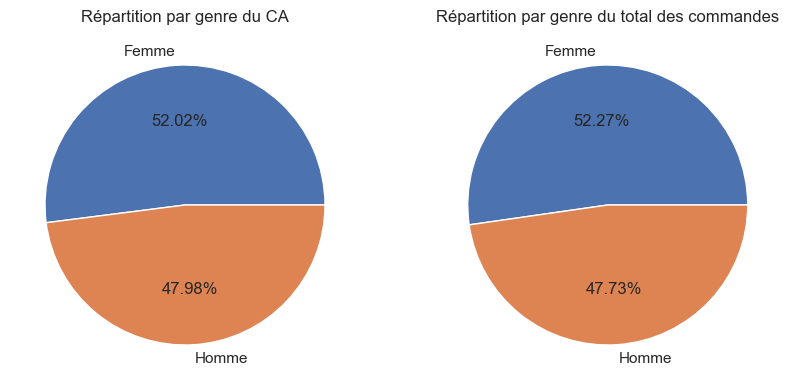

In [175]:
# Visualisation de la répartition du CA / du total des commandes par genre 

data1 = df_clients.groupby('genre')['CA'].sum()
data1 = data1.reset_index()

data2 = df_clients.groupby('genre')['total_commandes'].sum()
data2 = data2.reset_index()

plt.figure( figsize = ( 10, 10))
plt.rcParams['font.size'] = '12'

plt.subplot(2,2,1)
plt.pie(x=data1['CA'], labels=data1['genre'], autopct= '%.2f%%')
plt.title('Répartition par genre du CA')

plt.subplot(2,2,2)
plt.pie(x=data2['total_commandes'], labels=data2['genre'], autopct='%.2f%%')
plt.title('Répartition par genre du total des commandes')


Text(0.5, 1.0, 'Répartition par genre du total des ventes')

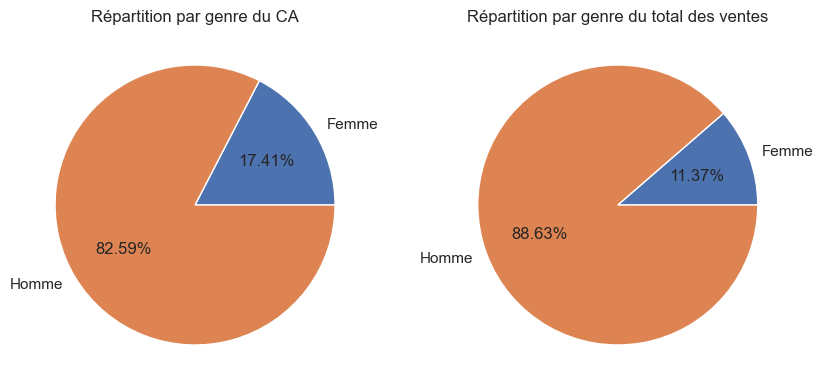

In [176]:
# Comparaison avec les clients pros

data3 = df_clients_pros.groupby('genre')['CA'].sum()
data3 = data3.reset_index()

data4 = df_clients_pros.groupby('genre')['total_commandes'].sum()
data4 = data4.reset_index()

plt.figure( figsize = ( 10, 10))
plt.rcParams['font.size'] = '12'

plt.subplot(2,2,1)
plt.pie(x=data3['CA'], labels=data3['genre'], autopct='%.2f%%')
plt.title('Répartition par genre du CA')

plt.subplot(2,2,2)
plt.pie(x=data4['total_commandes'], labels=data4['genre'], autopct='%.2f%%',)
plt.title('Répartition par genre du total des ventes')

In [177]:
df_clients_pros['total_commandes'].sum()

23039

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.9 - Répartition du CA entre les profils clients : analyse selon la tranche d'âge </h3>

In [178]:
# Ajout de la tranche d'âge (sans les pros)

age_bins = [19, 29, 39, 49, 59, 79, 100]
age_labels = ['19-29','30-39','40-49','50-59','60-79','80+']

df_clients['tranche_age'] = pd.cut(x=df_clients['age'], bins=age_bins, labels=age_labels, right=False)
df_clients

,id_client,age,genre,CA,total_commandes,tranche_age
0,c_1570,44,Femme,5285.82,159,40-49
1,c_3263,38,Femme,5276.87,143,30-39
2,c_2140,46,Femme,5260.18,147,40-49
3,c_2899,29,Femme,5214.05,69,30-39
4,c_7319,49,Femme,5155.77,145,50-59
...,...,...,...,...,...,...
8591,c_4478,53,Femme,13.36,1,50-59
8592,c_4648,19,Homme,11.20,1,19-29
8593,c_8114,61,Homme,9.98,2,60-79
8594,c_8140,52,Homme,8.30,2,50-59


In [179]:
# Vérifications valeurs

df_clients.describe(include='all')

,id_client,age,genre,CA,total_commandes,tranche_age
count,8596,8596.000000,8596,8596.000000,8596.000000,8596
unique,8596,NaN,2,NaN,NaN,6
top,c_1570,NaN,Femme,NaN,NaN,19-29
freq,1,NaN,4478,NaN,NaN,1788
mean,NaN,44.739646,NaN,1296.343300,37.513495,NaN
std,NaN,16.910542,NaN,958.404544,30.898817,NaN
min,NaN,19.000000,NaN,6.310000,1.000000,NaN
25%,NaN,31.000000,NaN,562.645000,15.000000,NaN
50%,NaN,44.000000,NaN,1045.585000,27.000000,NaN
75%,NaN,57.000000,NaN,1796.015000,50.000000,NaN


In [180]:
# Vérifications valeurs

df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 0 to 8595
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id_client        8596 non-null   object  
 1   age              8596 non-null   int64   
 2   genre            8596 non-null   object  
 3   CA               8596 non-null   float64 
 4   total_commandes  8596 non-null   int64   
 5   tranche_age      8596 non-null   category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 411.5+ KB


Text(0.5, 1.0, 'Répartition par âge du total des commandes')

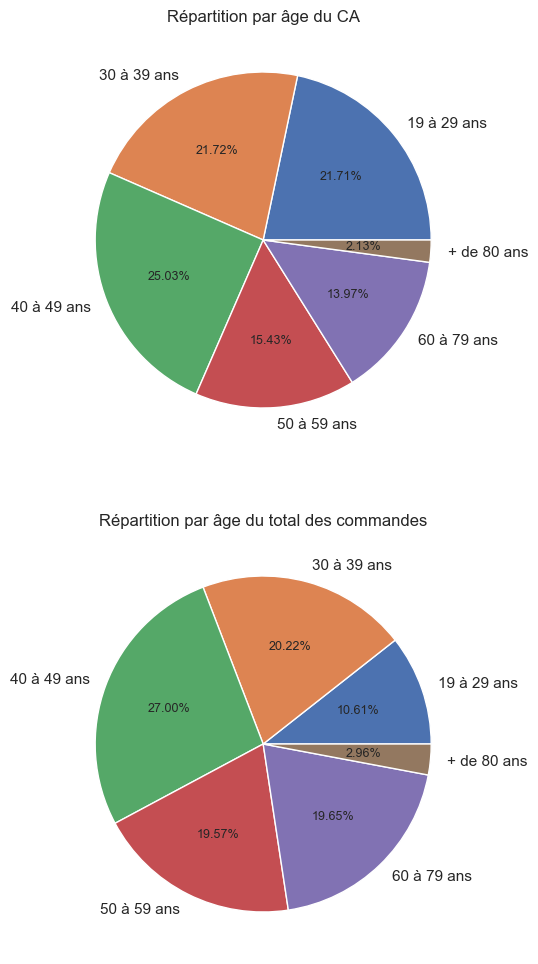

In [181]:
# Visualisation de la répartition du CA / du total des commandes par tranche d'âge


data5 = df_clients.groupby('tranche_age')['CA'].sum()
data5 = data5.reset_index()

data6 = df_clients.groupby('tranche_age')['total_commandes'].sum()
data6 = data6.reset_index()

labels = [ '19 à 29 ans', '30 à 39 ans', '40 à 49 ans','50 à 59 ans', '60 à 79 ans', '+ de 80 ans']

plt.figure( figsize = ( 12, 12))
plt.rcParams['font.size'] = '9'

plt.subplot(2,2,1)
plt.pie(x=data5['CA'], labels=labels, autopct= '%.2f%%')
plt.title('Répartition par âge du CA')

plt.subplot(2,2,3)
plt.pie(x=data6['total_commandes'], labels=labels, autopct='%.2f%%')
plt.title('Répartition par âge du total des commandes')


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.10 - Répartition du CA entre les profils clients : Courbe de Lorenz </h3>

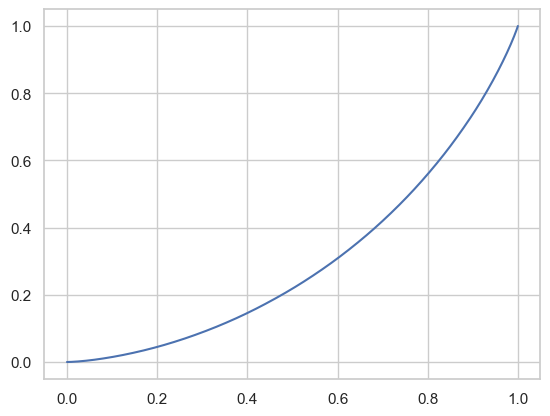

In [182]:
# Courbe de Lorenz pour visualiser la répartition (sans les clients pros)

prix = df_clients['CA'].values
n = len(prix)
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz)
plt.show()

In [183]:
# Ajout des clients pro pour comparer

df_tous_clients = pd.concat([df_clients,df_clients_pros])
df_tous_clients

,id_client,age,genre,CA,total_commandes,tranche_age
0,c_1570,44,Femme,5285.82,159,40-49
1,c_3263,38,Femme,5276.87,143,30-39
2,c_2140,46,Femme,5260.18,147,40-49
3,c_2899,29,Femme,5214.05,69,30-39
4,c_7319,49,Femme,5155.77,145,50-59
...,...,...,...,...,...,...
8595,c_8351,55,Femme,6.31,1,50-59
0,c_1609,43,Homme,326039.89,10997,NaN
1,c_4958,24,Homme,290227.03,3851,NaN
2,c_6714,55,Femme,153918.60,2620,NaN


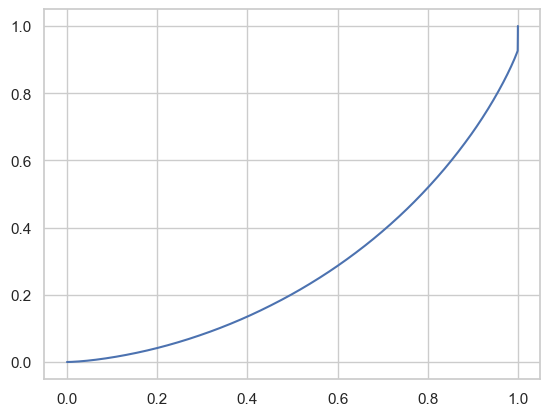

In [184]:
# Courbe de Lorenz pour visualiser la répartition (avec les clients pros)

prix = df_tous_clients['CA'].values
n = len(prix)
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz)
plt.show()

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.11 - Visualisation de la répartition des clients </h3>

<Axes: xlabel='tranche_age', ylabel='count'>

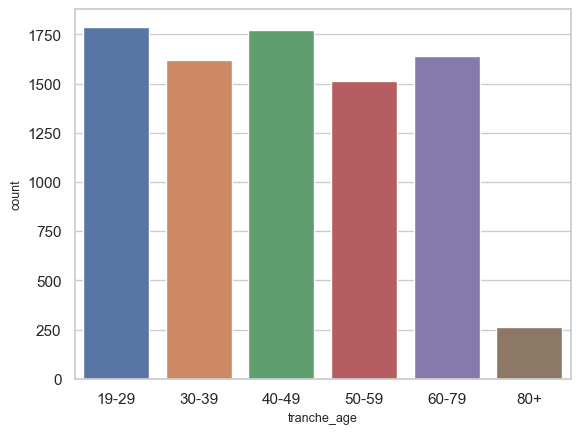

In [185]:
# Visulisation de la distribution de l'âge par tranches (sans les pros)

sns.countplot(data=df_clients, x='tranche_age')

<Axes: xlabel='genre', ylabel='count'>

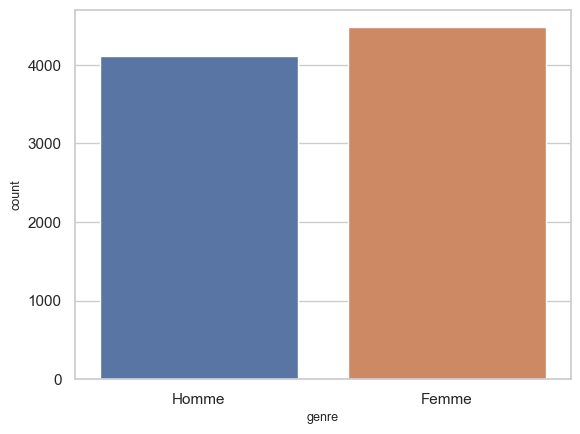

In [186]:
# Visualisation de la distribution du genre (sans les pros)

df_clients = df_clients.sort_values('genre', ascending=False)
sns.countplot(data=df_clients, x='genre')

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Recherche et étude des corrélations / associations </h2>

In [187]:
# Importation des librairies supplémentaires

import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, levene, wilcoxon

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.1 - Lien entre le genre des clients et la catégorie des livres achetés </h3>

In [188]:
# Affichage des données

df_corr1 = df2[['genre','categorie','id_client']]
df_corr1

,genre,categorie,id_client
0,Femme,0,c_329
1,Femme,0,c_329
2,Femme,0,c_329
3,Femme,0,c_329
4,Femme,1,c_329
...,...,...,...
687529,Homme,2,c_7739
687530,Homme,2,c_7739
687531,Femme,1,c_712
687532,Femme,1,c_712


In [189]:
# Filtrage des clients pros dans un autre df

df_corr1_pros = df_corr1.loc[(df_corr1['id_client'] == 'c_1609') | (df_corr1['id_client'] == 'c_4958') |
                             (df_corr1['id_client'] =='c_6714') | (df_corr1['id_client'] =='c_3454'),:]
df_corr1_pros

,genre,categorie,id_client
84,Homme,0,c_1609
85,Homme,0,c_1609
86,Homme,0,c_1609
87,Homme,0,c_1609
88,Homme,0,c_1609
...,...,...,...
103783,Homme,2,c_4958
103784,Homme,2,c_4958
103785,Homme,2,c_4958
103786,Homme,1,c_4958


In [190]:
# Suppression des données pros

df1_corr1 = df_corr1.drop(df_corr1_pros.index, axis=0)
df1_corr1

,genre,categorie,id_client
0,Femme,0,c_329
1,Femme,0,c_329
2,Femme,0,c_329
3,Femme,0,c_329
4,Femme,1,c_329
...,...,...,...
687529,Homme,2,c_7739
687530,Homme,2,c_7739
687531,Femme,1,c_712
687532,Femme,1,c_712


In [191]:
# Vérification

df1_corr1.loc[(df_corr1['id_client'] == 'c_1609') | (df_corr1['id_client'] == 'c_4958') |
              (df_corr1['id_client'] =='c_6714') | (df_corr1['id_client'] =='c_3454'),:]

,genre,categorie,id_client


#### Choix des tests :

Nous avons deux variables qualitatives, nous allons donc tester leurs associations. Nous commencerons par les visualiser pour faire une première analyse graphique.

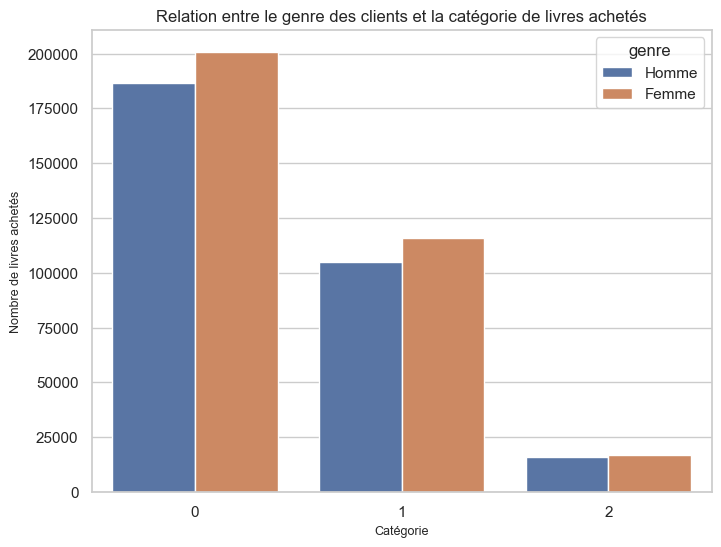

In [192]:
# Analyse graphique 

df1_corr1 = df1_corr1.sort_values('genre', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=df1_corr1, x='categorie', hue='genre')
plt.xlabel('Catégorie')
plt.ylabel("Nombre de livres achetés")
plt.title('Relation entre le genre des clients et la catégorie de livres achetés')
plt.show()

## Interprétation des résultats
À première vue, il n'y a pas de de lien particulier entre le genre et la catégorie.
Les variables sont qualitatives, les effectifs sont suffisants dans chaque groupe, donc nous allons choisir le test de Chi-2.


### Conditions d'utilisation :
- Les deux variables sont qualitatives (catégoriques).
- Les effectifs attendus sont supérieurs à 5 pour chaque croisement de variables
- Les observations doivent être indépendantes (un livre ne peut pas se trouver dans 2 catégories en même temps)

**Les conditions sont remplies, on peut donc effectuer le test de Chi-2.**

## Test du chi-carré (chi2)

### Hypothèses :
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.


In [193]:
# Création du tableau de contingence

table_contingence = pd.crosstab(df1_corr1['genre'], df1_corr1['categorie'])
table_contingence

categorie,0,1,2
genre,,,
Femme,200793,115721,16980
Homme,186488,104884,15868


In [194]:
# Test du Chi-2 et affichage des résultats

chi2_stat, p_value, dof, expected_freq = chi2_contingency(table_contingence)


print('Statistique du chi-carré : {}'.format(chi2_stat))
print('P-valeur : {}'.format(p_value,4))
print('Degrés de liberté : {}'.format(dof))
print('Fréquences attendues : \n{}'.format(expected_freq))

Statistique du chi-carré : 22.66856665178056
P-valeur : 1.1955928116587024e-05
Degrés de liberté : 2
Fréquences attendues : 
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]


### Interprétation des résultats :

Valeur du Chi-2 > 5.991 (valeur critique). On pourrait donc penser qu'il y a une association entre nos deux variables.

La p-valeur est inférieure au seuil de significativité (en général de 0.05), on peut rejeter H0 et confirmer qu'il y a effectivement association. 

Nous allons confirmer ou non en mesurant la force de la potentielle association entre nos 2 variables avec le coefficient de Cramer-V. Il varie entre 0 (pas d'association) et 1 (association parfaite).

## Coefficient de Cramer-V

### Conditions d'utilisation :
- Les deux variables sont qualitatives (catégoriques).
- Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.

### Hypothèses :
- H0 (hypothèse nulle): Il n'y a pas de relation entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une relation entre les deux variables qualitatives.

In [195]:
# Calcul du  coefficient de Cramer-V

n = table_contingence.sum().sum()
min_dim = min(table_contingence.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramer-V

print("Coefficient de Cramer-V :", cramer_v)

Coefficient de Cramer-V : 0.005948029928802536


### Interprétation des résultats :

Le coefficient est proche de 0, on ne peut pas confirmer l'association entre nos 2 variables 'genre' et 'categorie'.

Testons cela à nouveau avec un coefficient T de Tschuprow pour confirmer.

## Coefficient T de Tschuprow

### Conditions d'utilisation :
- Les variables sont qualitatives.
- Les observations sont indépendantes.
- Les effectifs des cellules du tableau de contingence sont suffisants (généralement, chaque cellule doit avoir un effectif d'au moins 5).


### Hypothèses :
- H0 (hypothèse nulle): Il n'y a pas de relation entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une relation entre les deux variables qualitatives.

In [196]:
# Confirmation avec le coefficient T de Tschuprow

n = df1_corr1.shape[0]
min_dim = min(table_contingence.shape) - 1

chi2, p_value, _, _ = st.chi2_contingency(table_contingence)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)

Coefficient T de Tschuprow : 0.005948029928802536
P-valeur : 1.1955928116587024e-05


### Interprétation des résultats :

Le coefficient T de Tschuprow varie entre 0 et 1. Une valeur proche de 0 indique une faible liaison entre les deux variables.

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.2 - Lien entre l'âge des clients et le montant total des achats </h3>

In [197]:
# Récupération des données (sans les clients pros)

df_corr2 = df_clients[['age','CA','tranche_age']]
df_corr2

,age,CA,tranche_age
2825,45,1511.53,40-49
2911,40,1477.32,40-49
2896,63,1480.94,60-79
2897,35,1480.87,30-39
7079,70,433.52,60-79
...,...,...,...
3761,41,1194.65,40-49
3758,79,1195.05,80+
3756,34,1195.56,30-39
3755,37,1195.69,30-39


In [198]:
# Vérification

df_corr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 2825 to 8595
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          8596 non-null   int64   
 1   CA           8596 non-null   float64 
 2   tranche_age  8596 non-null   category
dtypes: category(1), float64(1), int64(1)
memory usage: 210.1 KB


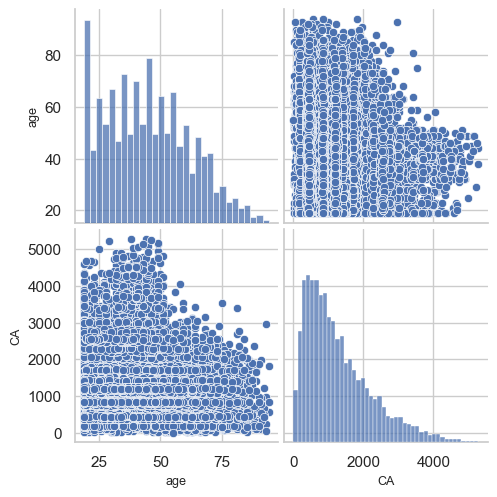

In [199]:
# Première visualisation 

sns.pairplot(df_corr2,
             kind="scatter")

### Interprétation des résultats :

Analyse visuelle très peu concluante, les variables n'ont pas l'air de suivre une distribution normale.
Nous allons confirmer avec un test de normalité.

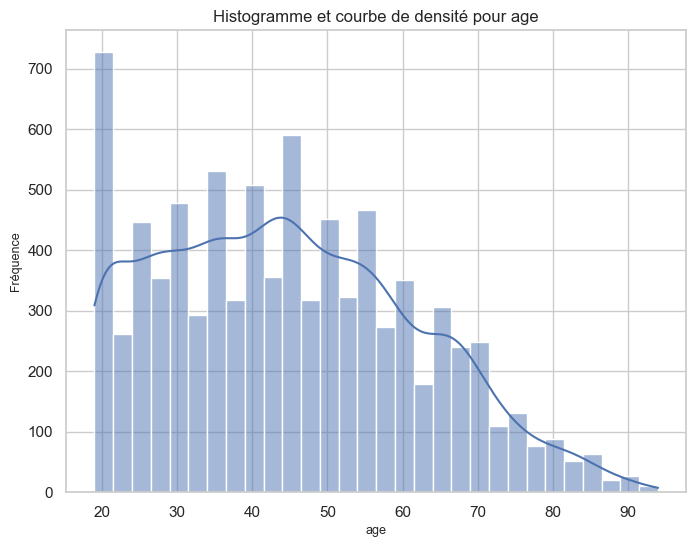

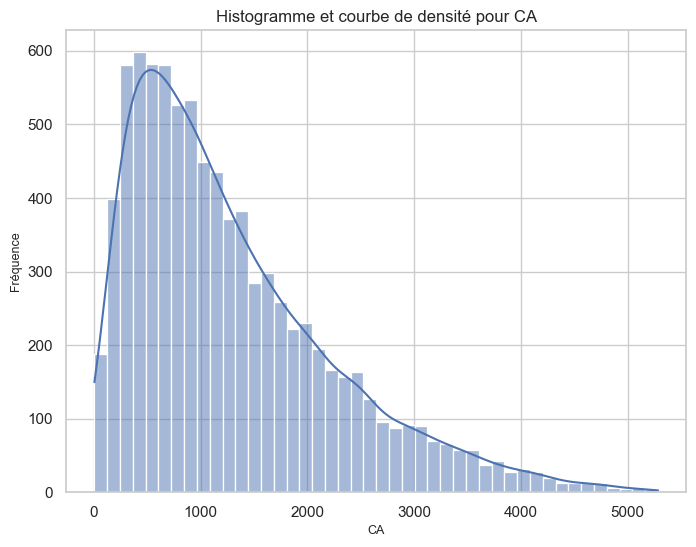

Skewness pour age: 0.36168245587291936
Kurtosis réel pour age: 2.366461911121336
Excès de kurtosis: age : -0.6335380888786641
Skewness pour CA: 1.1597254275806106
Kurtosis réel pour CA: 4.093089314183701
Excès de kurtosis: CA : 1.0930893141837013
P-valeur de la normalité (Kolmogorov-Smirnov) - Age:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - CA:  0.0


In [200]:
# Analyse de la normalité 

var1 = 'age'
var2 = 'CA'


# Analyse graphique de la normalité des deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_corr2[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité avec calcul du skewness et du kurtosis

for var in [var1, var2]:
    skewness = st.skew(df_corr2[var])
    kurtosis = st.kurtosis(df_corr2[var],fisher=False)
    excess_kurtosis = st.kurtosis(df_corr2[var])
    print(f"Skewness pour {var}: {skewness}")
    print(f"Kurtosis réel pour {var}: {kurtosis}")
    print(f"Excès de kurtosis: {var} : {excess_kurtosis}")
    

# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (groupes de + de 50 individus)
_, var1_p_value = st.kstest(df_corr2[var1], 'norm')
_, var2_p_value = st.kstest(df_corr2[var2], 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - Age: ", var1_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - CA: ", var2_p_value)


### Interprétation des résultats :

Les distributions ne sont pas normales, nous allons donc choisir le test de Spearman pour confirmer ou non l'hypothèse d'une corrélation monotone (visiblement non linéaire) entre nos deux variables quantitatives 'age' et 'CA'.

## Corrélation de Spearman

### Hypothèses :

- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [201]:
# Corrélation de spearman

spearmanr(df_corr2['age'], df_corr2['CA'])

SignificanceResult(statistic=-0.18453810751215788, pvalue=1.0211908275536398e-66)

### Interprétation des résultats :

Le coefficient de Spearman indique une très faible corrélation négative et monotone entre les 2 variables.

De plus, la p-valeur est inférieure à 0.05, on peut rejeter l'hypothèse nulle. 


**Confirmation avec coefficient de corrélation de Kendall :**

## Test de corrélation de Kendall
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

## Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [202]:
# Calcul de la corrélation de kendall

kendalltau(df_corr2['age'], df_corr2['CA'])

SignificanceResult(statistic=-0.12370636188564996, pvalue=3.877959651316149e-65)

**Même résultat**

Nous allons donc discrétiser notre variable 'age' et étudier l'association entre notre nouvelle variable 'tranche_age' (qualitative) et le CA (quantitative) 

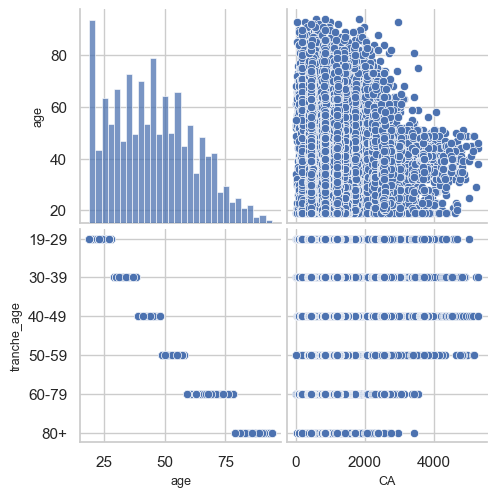

In [203]:
# Première visualisation 

sns.pairplot(df_corr2,  
             y_vars = ['age','tranche_age'],
             kind="scatter")

(0.0, 6356.770518213794)

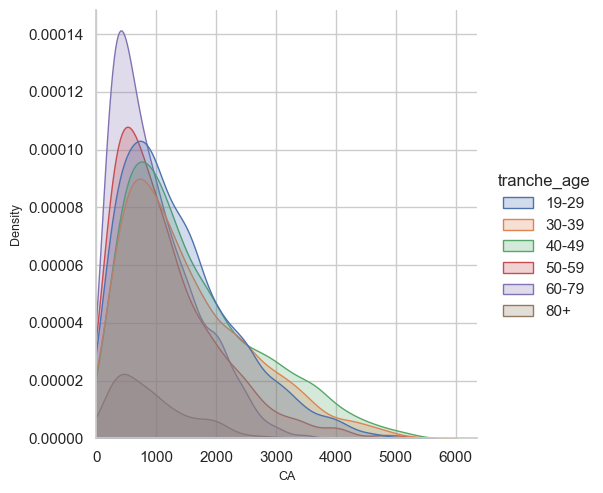

In [204]:
# Affichage des distributions superposées par tranche d'âge

sns.displot(df_corr2, x='CA', hue='tranche_age', kind='kde', fill=True)
plt.xlim(left=0)

In [205]:
# Vérification de la normalité

# Séparer les données en groupes en fonction de la tranche d'âge

groupe20ans = df_corr2[df_corr2['tranche_age'] == '19-29']['CA']
groupe30ans = df_corr2[df_corr2['tranche_age'] == '30-39']['CA']
groupe40ans = df_corr2[df_corr2['tranche_age'] == '40-49']['CA']
groupe50ans = df_corr2[df_corr2['tranche_age'] == '50-59']['CA']
groupe60_79ans = df_corr2[df_corr2['tranche_age'] == '60-79']['CA']
groupe80_99ans = df_corr2[df_corr2['tranche_age'] == '80+']['CA']

# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (groupes de + de 50 individus)
_, groupe20ans_p_value = st.kstest(groupe20ans, 'norm')
_, groupe30ans_p_value = st.kstest(groupe30ans, 'norm')
_, groupe40ans_p_value = st.kstest(groupe40ans, 'norm')
_, groupe50ans_p_value = st.kstest(groupe50ans, 'norm')
_, groupe60_79ans_p_value = st.kstest(groupe60_79ans, 'norm')
_, groupe80_99ans_p_value = st.kstest(groupe80_99ans, 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - groupe20ans: ", groupe20ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov - groupe30ans: ", groupe30ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - groupe40ans: ", groupe40ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - groupe50ans: ", groupe50ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - groupe60_79ans: ", groupe60_79ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - groupe80_99ans: ", groupe80_99ans_p_value)

P-valeur de la normalité (Kolmogorov-Smirnov) - groupe20ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov - groupe30ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - groupe40ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - groupe50ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - groupe60_79ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - groupe80_99ans:  0.0


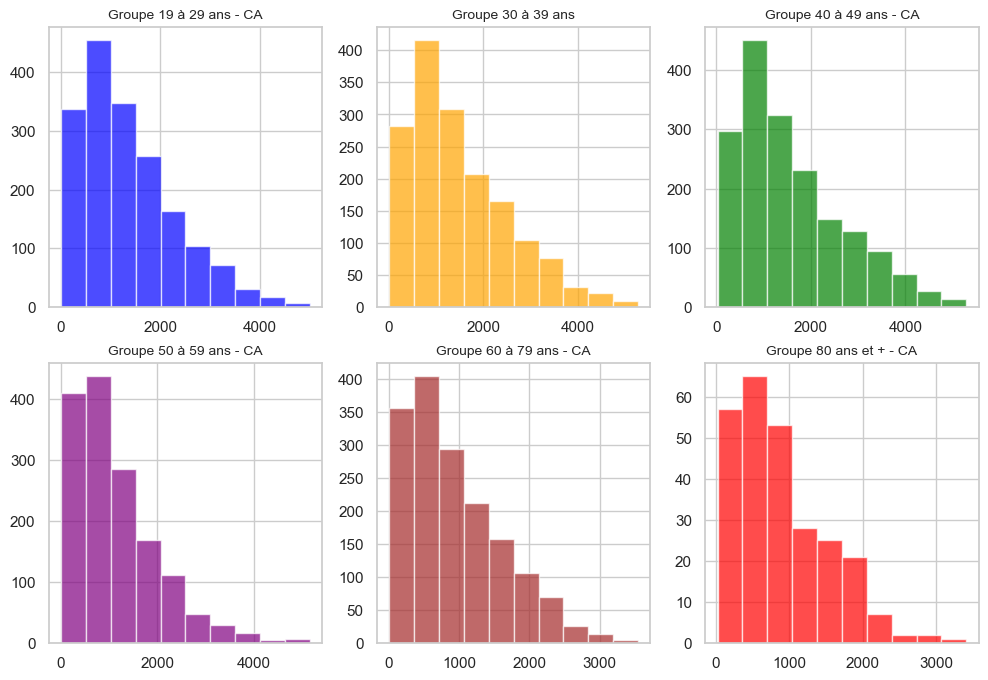

In [206]:
# Histogrammes pour vérifier visuellement la normalité

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.hist(groupe20ans, bins=10, color='blue', alpha=0.7)
plt.title("Groupe 19 à 29 ans - CA", fontsize=10)

plt.subplot(232)
plt.hist(groupe30ans, bins=10, color='orange', alpha=0.7)
plt.title("Groupe 30 à 39 ans", fontsize=10)

plt.subplot(233)
plt.hist(groupe40ans, bins=10, color='green', alpha=0.7)
plt.title("Groupe 40 à 49 ans - CA", fontsize=10)

plt.subplot(234)
plt.hist(groupe50ans, bins=10, color='purple', alpha=0.7)
plt.title("Groupe 50 à 59 ans - CA", fontsize=10)

plt.subplot(235)
plt.hist(groupe60_79ans, bins=10, color='brown', alpha=0.7)
plt.title("Groupe 60 à 79 ans - CA", fontsize=10)

plt.subplot(236)
plt.hist(groupe80_99ans, bins=10, color='red', alpha=0.7)
plt.title("Groupe 80 ans et + - CA", fontsize=10)

plt.show()

### Interprétation des résultats :

Les distributions des variables ne suivent pas une loi normale.

## Analyse graphique avec boxplots :

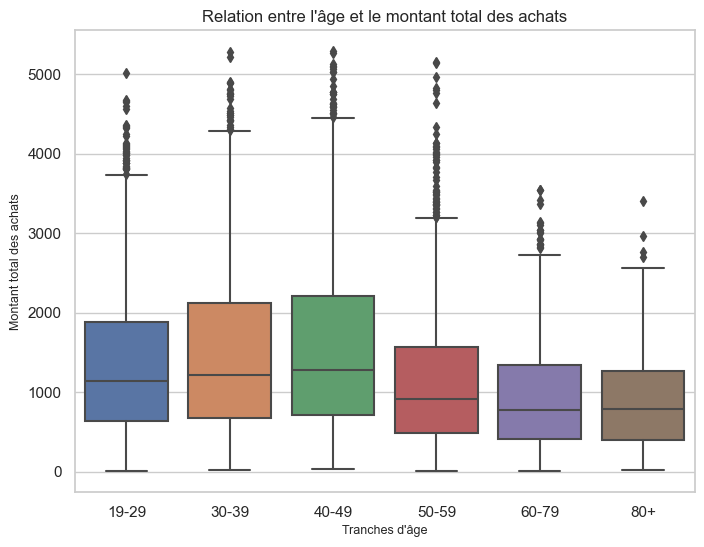

In [207]:
# Analyse visuelle par boxplot 

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_corr2, x='tranche_age', y='CA')
plt.xlabel("Tranches d'âge")
plt.ylabel('Montant total des achats')
plt.title("Relation entre l'âge et le montant total des achats")
plt.show()

### Interprétation des résultats :

Visuellement, on peut apercevoir que la tranche d'âge '40-49 ans' est celle qui a tendance à avoir la plus haute valeur centrale. On observe une tendance centrale qui monte légèrement, puis descend à partir de la tranche d'âge '50-59 ans'.


Nous allons étudier les distributions des différents groupes avec un test de Kruskal-Wallis pour déterminer si elles sont égales ou différentes.

## Test de Kruskal-Wallis 

### Hypothèses :
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [208]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(groupe20ans, groupe30ans, groupe40ans, groupe50ans, groupe60_79ans, groupe80_99ans)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 483.4873622550261
P-valeur (Kruskal-Wallis) : 2.9251066965662974e-102


### Interprétation des résultats

L'hypothèse nulle peut être rejetée (p-value < 0.05).
Nous allons donc les étudier et les comparer 2 par 2 avec le test de Mann-Whitney.

## Test de Mann-Whitney ###

### Hypothèses :
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [209]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe20ans,groupe30ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1350419.5
P-valeur (Mann-Whitney) : 0.000646145166553066


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.    
On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [210]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe30ans,groupe40ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1382729.5
P-valeur (Mann-Whitney) : 0.06902314001072728


Valeur de p > α : la différence entre les médianes n'est pas presque pas statistiquement significative (Impossible de rejeter H0 car p-value > 0.05)

In [211]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe40ans,groupe50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1670917.0
P-valeur (Mann-Whitney) : 5.733819984942328e-34


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.    
On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [212]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe50ans,groupe60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1375187.0
P-valeur (Mann-Whitney) : 2.3860257968259544e-07


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.    
On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [213]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe60_79ans,groupe80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 219605.0
P-valeur (Mann-Whitney) : 0.5081140017266169


Valeur de p > α : la différence entre les médianes n'est pas statistiquement significative (Impossible de rejeter H0)

In [214]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe50ans,groupe80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 223846.5
P-valeur (Mann-Whitney) : 0.0006357920164895384


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [215]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe20ans,groupe40ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1419442.5
P-valeur (Mann-Whitney) : 9.02883739858208e-08


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [216]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe20ans,groupe50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1554391.5
P-valeur (Mann-Whitney) : 2.430910644361657e-13


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [217]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe20ans,groupe60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1840836.5
P-valeur (Mann-Whitney) : 4.112277491608615e-38


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [218]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe20ans,groupe80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 299303.0
P-valeur (Mann-Whitney) : 1.4868422873010316e-13


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [219]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe30ans,groupe50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1486591.0
P-valeur (Mann-Whitney) : 1.2570617090928548e-24


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [220]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe30ans,groupe60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1751160.0
P-valeur (Mann-Whitney) : 1.603212287214916e-55


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [221]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe30ans,groupe80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 284424.0
P-valeur (Mann-Whitney) : 3.0704698733419795e-19


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [222]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe40ans,groupe60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1962002.5
P-valeur (Mann-Whitney) : 4.147482850614279e-70


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [223]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe40ans,groupe80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 318726.0
P-valeur (Mann-Whitney) : 4.1524332982626013e-23


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

In [224]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe50ans,groupe80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 223846.5
P-valeur (Mann-Whitney) : 0.0006357920164895384


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0.

On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

## Interprétation des résultats :

Après avoir testé les différentes combinaisons, nous pouvons confirmer plusieurs choses :
- le groupe 20 ans a une distribution statistiquement différente de tous les autres groupes
- la plupart des tests sont confirmés, on a une différence de distributions dans la majorité des cas

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.3 - Lien entre l'âge des clients et la fréquence des achats (sur toute la période) </h3>

In [225]:
# Récupération des données

dfcorr3 = df_clients[['id_client','age','total_commandes','tranche_age']].copy()
dfcorr3

,id_client,age,total_commandes,tranche_age
2825,c_3704,45,41,40-49
2911,c_8467,40,42,40-49
2896,c_2208,63,85,60-79
2897,c_2920,35,44,30-39
7079,c_454,70,12,60-79
...,...,...,...,...
3761,c_7131,41,46,40-49
3758,c_3916,79,48,80+
3756,c_6101,34,31,30-39
3755,c_5340,37,42,30-39


In [226]:
# Vérification pas de client pro

dfcorr3.loc[(dfcorr3['id_client'] == 'c_1609') | (dfcorr3['id_client'] == 'c_4958') |
              (dfcorr3['id_client'] =='c_6714') | (dfcorr3['id_client'] =='c_3454'),:]

,id_client,age,total_commandes,tranche_age


In [227]:
# Vérification des données

dfcorr3.info()
dfcorr3.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 2825 to 8595
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id_client        8596 non-null   object  
 1   age              8596 non-null   int64   
 2   total_commandes  8596 non-null   int64   
 3   tranche_age      8596 non-null   category
dtypes: category(1), int64(2), object(1)
memory usage: 535.3+ KB


,id_client,age,total_commandes,tranche_age
count,8596,8596.000000,8596.000000,8596
unique,8596,NaN,NaN,6
top,c_3704,NaN,NaN,19-29
freq,1,NaN,NaN,1788
mean,NaN,44.739646,37.513495,NaN
std,NaN,16.910542,30.898817,NaN
min,NaN,19.000000,1.000000,NaN
25%,NaN,31.000000,15.000000,NaN
50%,NaN,44.000000,27.000000,NaN
75%,NaN,57.000000,50.000000,NaN


In [228]:
# Tri croissant par nombre de commandes

dfcorr3 = dfcorr3.sort_values(['total_commandes'],ascending=True)
dfcorr3 = dfcorr3.reset_index(drop=True)
display(dfcorr3)

,id_client,age,total_commandes,tranche_age
0,c_8351,55,1,50-59
1,c_3327,47,1,40-49
2,c_4648,19,1,19-29
3,c_6256,49,1,50-59
4,c_6292,31,1,30-39
...,...,...,...,...
8591,c_8510,32,162,30-39
8592,c_669,35,163,30-39
8593,c_1637,35,165,30-39
8594,c_2265,55,165,50-59


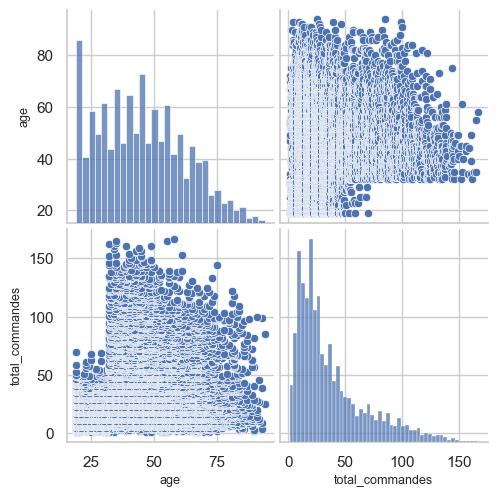

In [229]:
# Première visualisation de la relation entre les variables 'age' et 'total_commandes'

sns.pairplot(dfcorr3, kind="scatter")

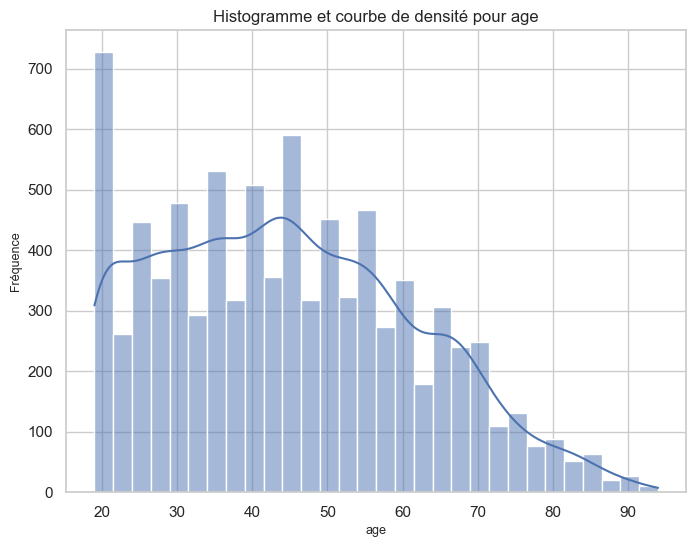

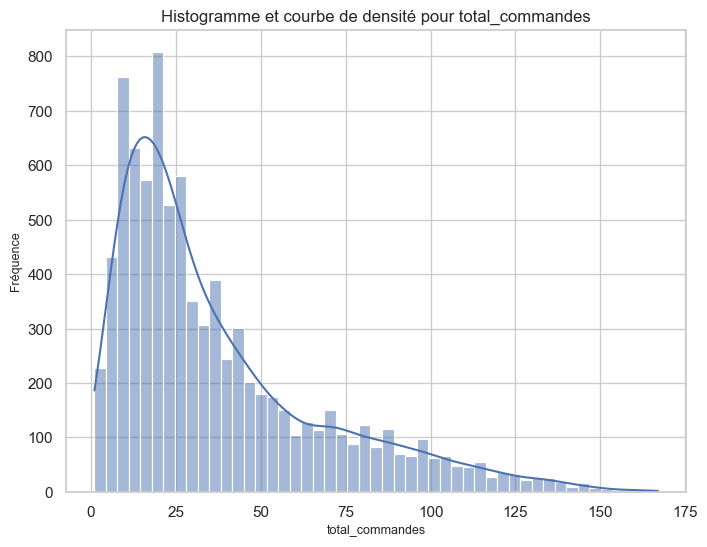

Skewness pour age: 0.3616824558729193
Kurtosis réel pour age: 2.366461911121336
Excès de kurtosis: age : -0.6335380888786641
Skewness pour total_commandes: 1.3553332687554485
Kurtosis réel pour total_commandes: 4.332144163523928
Excès de kurtosis: total_commandes : 1.3321441635239282
P-valeur de la normalité (Kolmogorov-Smirnov) - age:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - total_commandes:  0.0


In [230]:
# Analyse de la normalité 

var1 = 'age'
var2 = 'total_commandes'


# Analyse graphique de la normalité des deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(dfcorr3[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité avec calcul du skewness et du kurtosis

for var in [var1, var2]:
    skewness = st.skew(dfcorr3[var])
    kurtosis = st.kurtosis(dfcorr3[var],fisher=False)
    excess_kurtosis = st.kurtosis(dfcorr3[var])
    print(f"Skewness pour {var}: {skewness}")
    print(f"Kurtosis réel pour {var}: {kurtosis}")
    print(f"Excès de kurtosis: {var} : {excess_kurtosis}")
    
    
# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (groupes de + de 50 individus)
_, var1_p_value = st.kstest(dfcorr3[var1], 'norm')
_, var2_p_value = st.kstest(dfcorr3[var2], 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - age: ", var1_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - total_commandes: ", var2_p_value)


### Interprétation des résultats :

Les distributions ne sont pas normales, nous allons donc choisir le test de Spearman pour confirmer ou non l'hypothèse d'une corrélation monotone (visiblement non linéaire) entre nos deux variables quantitatives 'age' et 'total_commandes'.

## Corrélation de Spearman
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [231]:
# Corrélation de spearman

spearmanr(dfcorr3['age'], dfcorr3['total_commandes'])

SignificanceResult(statistic=0.21196373259671872, pvalue=6.629168433162815e-88)

### Interprétation des résultats :

Le coefficient de Spearman a l'air faussé car on s'attend à un résultat négatif (corrélation négative).
On ne peut donc pas confirmer ce résultat, cependant on suspecte une corrélation monotone (linéaire ou non linéaire) entre les variables.

La p-valeur est inférieure à 0.05, on pourrait rejeter l'hypothèse nulle.

**Confirmation avec coefficient de corrélation de Kendall :**

## Test de corrélation de Kendall
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

## Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [232]:
# Calcul de la corrélation de kendall

kendalltau(dfcorr3['age'], dfcorr3['total_commandes'])

SignificanceResult(statistic=0.14279906175887244, pvalue=5.233273720798705e-85)

**Même résultat**

Nous allons tester à nouveau après avoir retiré le groupe des plus jeunes (< 31 ans)

In [233]:
# Création d'un df avec les jeunes

df_corr3_v2 = dfcorr3.copy()
df_corr3_jeunes = df_corr3_v2.loc[(df_corr3_v2['age'] <= 31)]
df_corr3_jeunes

,id_client,age,total_commandes,tranche_age
2,c_4648,19,1,19-29
4,c_6292,31,1,30-39
6,c_2290,25,1,19-29
7,c_3615,19,1,19-29
11,c_1412,30,1,30-39
...,...,...,...,...
6956,c_50,29,62,30-39
7005,c_6173,25,63,19-29
7148,c_5263,25,68,19-29
7206,c_2899,29,69,30-39


In [234]:
# Retrait des jeunes dans le df initial

df_corr3_v2 = df_corr3_v2.drop(df_corr3_jeunes.index, axis=0)
df_corr3_v2

,id_client,age,total_commandes,tranche_age
0,c_8351,55,1,50-59
1,c_3327,47,1,40-49
3,c_6256,49,1,50-59
5,c_450,70,1,60-79
8,c_4478,53,1,50-59
...,...,...,...,...
8591,c_8510,32,162,30-39
8592,c_669,35,163,30-39
8593,c_1637,35,165,30-39
8594,c_2265,55,165,50-59


In [235]:
# Vérification

df_corr3_v2.loc[(df_corr3_v2['age'] <= 30)]

,id_client,age,total_commandes,tranche_age


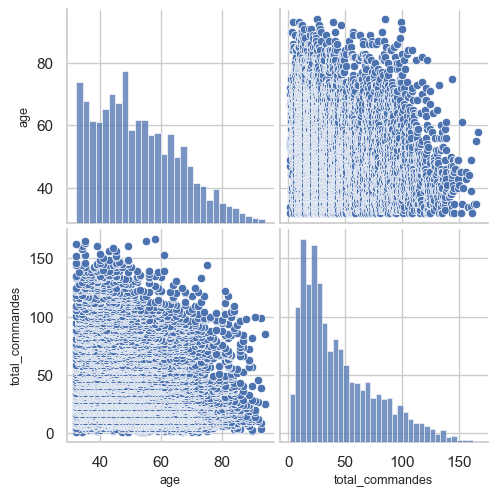

In [236]:
# Visualisation

sns.pairplot(df_corr3_v2, kind="scatter")

In [237]:
# Test de spearman sur le dataset sans les jeunes

spearmanr(df_corr3_v2['age'], df_corr3_v2['total_commandes'])

SignificanceResult(statistic=-0.14759515655551586, pvalue=3.6670140717793306e-32)

In [238]:
# Calcul de la corrélation de kendall sans les jeunes

kendalltau(df_corr3_v2['age'], df_corr3_v2['total_commandes'])

SignificanceResult(statistic=-0.09992168308003337, pvalue=9.701804489540215e-32)

### Interprétation des résultats :

Le coefficient de Spearman indique une faible corrélation négative et monotone entre les 2 variables, et rejette l'hypothèse nulle puisque p-valeur < 0.05.

Le coefficient de Kendall confirme les mêmes choses.

On peut donc confirmer qu'il y a une faible corrélation entre nos 2 variables, négative et monotone, cependant le groupe des jeunes fait exception.


## Analyse avec les tranches d'âges

Nous allons discrétiser notre variable 'age' et étudier l'association entre notre nouvelle variable 'tranche_age' (qualitative) et total_ventes (quantitative) 

In [239]:
# Ajout de la tranche d'âge 

age_bins = [19, 29, 39, 49, 59, 79, 100]
age_labels = ['19-29','30-39','40-49','50-59','60-79','80+']

dfcorr3['tranche_age'] = pd.cut(x=dfcorr3['age'], bins=age_bins, labels=age_labels, right=False)
dfcorr3

,id_client,age,total_commandes,tranche_age
0,c_8351,55,1,50-59
1,c_3327,47,1,40-49
2,c_4648,19,1,19-29
3,c_6256,49,1,50-59
4,c_6292,31,1,30-39
...,...,...,...,...
8591,c_8510,32,162,30-39
8592,c_669,35,163,30-39
8593,c_1637,35,165,30-39
8594,c_2265,55,165,50-59


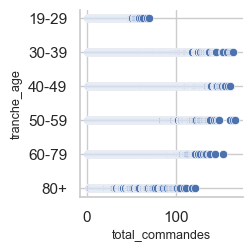

In [240]:
# Analyse graphique

sns.pairplot(dfcorr3,
             x_vars = ['total_commandes'],
             y_vars = ['tranche_age'],
             kind="scatter")

(0.0, 199.63428396186993)

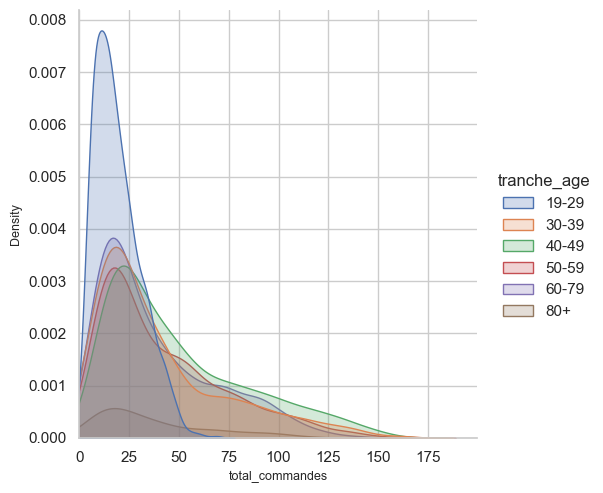

In [241]:
# Affichage des distributions superposées par tranche d'âge

sns.displot(dfcorr3, x='total_commandes', hue='tranche_age', kind='kde', fill=True)
plt.xlim(left=0)

In [242]:
# Vérification de la normalité

# Séparer les données en groupes en fonction de la tranche d'âge

tranche20ans = dfcorr3[dfcorr3['tranche_age'] == '19-29']['total_commandes']
tranche30ans = dfcorr3[dfcorr3['tranche_age'] == '30-39']['total_commandes']
tranche40ans = dfcorr3[dfcorr3['tranche_age'] == '40-49']['total_commandes']
tranche50ans = dfcorr3[dfcorr3['tranche_age'] == '50-59']['total_commandes']
tranche60_79ans = dfcorr3[dfcorr3['tranche_age'] == '60-79']['total_commandes']
tranche80_99ans = dfcorr3[dfcorr3['tranche_age'] == '80+']['total_commandes']

# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (groupes de + de 50 individus)
_, tranche20ans_p_value = st.kstest(tranche20ans, 'norm')
_, tranche30ans_p_value = st.kstest(tranche30ans, 'norm')
_, tranche40ans_p_value = st.kstest(tranche40ans, 'norm')
_, tranche50ans_p_value = st.kstest(tranche50ans, 'norm')
_, tranche60_79ans_p_value = st.kstest(tranche60_79ans, 'norm')
_, tranche80_99ans_p_value = st.kstest(tranche80_99ans, 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche20ans: ", tranche20ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov - tranche30ans: ", tranche30ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche40ans: ", tranche40ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche50ans: ", tranche50ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche60_79ans: ", tranche60_79ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche80_99ans: ", tranche80_99ans_p_value)

P-valeur de la normalité (Kolmogorov-Smirnov) - tranche20ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov - tranche30ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche40ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche50ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche60_79ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche80_99ans:  0.0


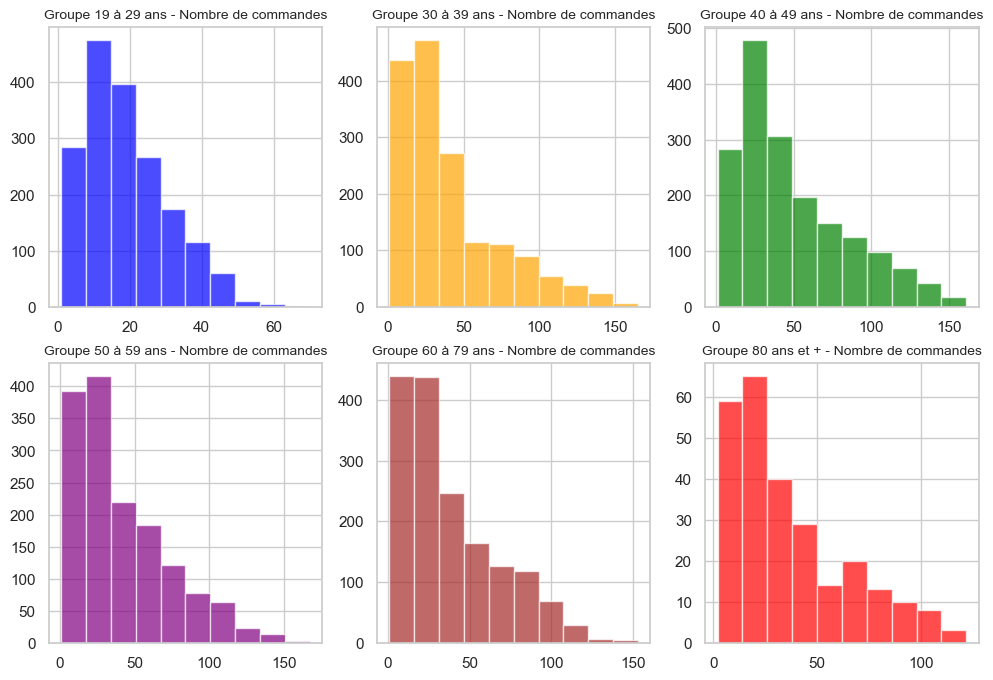

In [243]:
# Histogrammes pour vérifier visuellement la normalité

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.hist(tranche20ans, bins=10, color='blue', alpha=0.7)
plt.title("Groupe 19 à 29 ans - Nombre de commandes", fontsize=10)

plt.subplot(232)
plt.hist(tranche30ans, bins=10, color='orange', alpha=0.7)
plt.title("Groupe 30 à 39 ans - Nombre de commandes", fontsize=10)

plt.subplot(233)
plt.hist(tranche40ans, bins=10, color='green', alpha=0.7)
plt.title("Groupe 40 à 49 ans - Nombre de commandes", fontsize=10)

plt.subplot(234)
plt.hist(tranche50ans, bins=10, color='purple', alpha=0.7)
plt.title("Groupe 50 à 59 ans - Nombre de commandes", fontsize=10)

plt.subplot(235)
plt.hist(tranche60_79ans, bins=10, color='brown', alpha=0.7)
plt.title("Groupe 60 à 79 ans - Nombre de commandes", fontsize=10)

plt.subplot(236)
plt.hist(tranche80_99ans, bins=10, color='red', alpha=0.7)
plt.title("Groupe 80 ans et + - Nombre de commandes", fontsize=10)

plt.show()

### Interprétation des résultats :

Les distributions des variables ne suivent pas une loi normale.

## Analyse graphique avec boxplots :

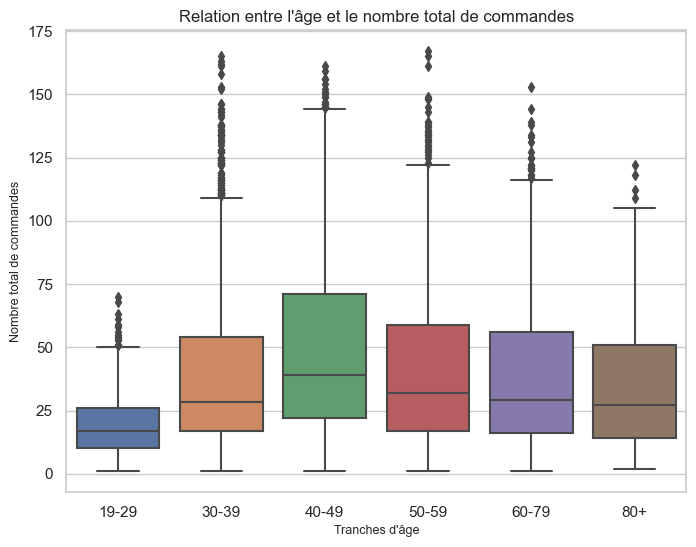

In [244]:
# Analyse visuelle par boxplot 

plt.figure(figsize=(8, 6))
sns.boxplot(data=dfcorr3, x='tranche_age', y='total_commandes')
plt.xlabel("Tranches d'âge")
plt.ylabel('Nombre total de commandes')
plt.title("Relation entre l'âge et le nombre total de commandes")
plt.show()

### Interprétation des résultats :

Visuellement, nous pouvons constater que la tranche d'âge '40-49 ans' est celle qui a tendance à avoir le plus grand nombre de commandes. On observe une tendance centrale qui monte, puis descend et stagne à partir de la tranche d'âge '50-59 ans'. 

On observe également que le groupe des jeunes se détache nettement des autres groupes.

Nous allons étudier les distributions des différents groupes avec un test de Kruskal-Wallis pour déterminer si elles sont égales ou différentes.

## Test de Kruskal-Wallis 

### Hypothèses :
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [245]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(tranche20ans, tranche30ans, tranche40ans, tranche50ans, tranche60_79ans, tranche80_99ans)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 1030.2515721298548
P-valeur (Kruskal-Wallis) : 1.6951626432380242e-220


### Interprétation des résultats :

La P-valeur est inférieure à 0.05, donc l'hyposthèse nulle est rejetée.
Il y a donc au moins une des distributions qui est différente des autres.

Nous allons comparer les distributions 2 à 2 avec le test de Mann-Whitney pour confirmer.

## Test de Mann-Whitney

### Hypothèses :
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

In [246]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche20ans,tranche30ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 856117.0
P-valeur (Mann-Whitney) : 1.0137353049314516e-94


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [247]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche30ans,tranche40ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1185192.0
P-valeur (Mann-Whitney) : 2.0292670197496223e-18


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [248]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche40ans,tranche50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1517677.0
P-valeur (Mann-Whitney) : 8.13925704901426e-11


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [249]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche50ans,tranche60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1306886.0
P-valeur (Mann-Whitney) : 0.012558621264639303


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [250]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche60_79ans,tranche80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 221861.0
P-valeur (Mann-Whitney) : 0.3494625630997965


Valeur de p > α : la différence entre les médianes n'est pas statistiquement significative (Impossible de rejeter H0)

In [251]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche20ans,tranche40ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 655806.5
P-valeur (Mann-Whitney) : 3.2547808003290525e-201


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [252]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche20ans,tranche50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 737051.5
P-valeur (Mann-Whitney) : 3.3797226599662825e-113


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [253]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche20ans,tranche60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 871800.5
P-valeur (Mann-Whitney) : 6.325055041937202e-94


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [254]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche20ans,tranche80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 146208.0
P-valeur (Mann-Whitney) : 1.6426894282148555e-22


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [255]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche30ans,tranche50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1174295.5
P-valeur (Mann-Whitney) : 0.03686945435288193


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [256]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche30ans,tranche60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1340270.5
P-valeur (Mann-Whitney) : 0.6807242139456555


Valeur de p > α : la différence entre les médianes n'est pas statistiquement significative

In [257]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche30ans,tranche80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 220513.5
P-valeur (Mann-Whitney) : 0.2635651071003935


Valeur de p > α : la différence entre les médianes n'est pas statistiquement significative

In [258]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche40ans,tranche60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1720711.0
P-valeur (Mann-Whitney) : 1.2932247092094048e-20


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [259]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche40ans,tranche80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 282295.0
P-valeur (Mann-Whitney) : 7.299272271137088e-09


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [260]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(tranche50ans,tranche80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 215196.0
P-valeur (Mann-Whitney) : 0.022274615416569946


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

### Interprétation des résultats ###

Nous avons confirmé plusieurs choses ici :
- le groupe des 20 ans a une distribution différente de tous les autres groupes
- le groupe des 30 ans a une distribution différente de tous les autres groupes
- les distributions des groupes 30 ans, 60 ans, et + de 80 ans ne sont pas beaucoup différentes entre elles, mais sont différentes des autres groupes

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.4 - Lien entre l'âge des clients et la taille du panier moyen (sur toute la période)</h3>

In [261]:
# Récupération des données (sans les clients pros)

df_corr4 = dfcorr3.copy()
df_corr4

,id_client,age,total_commandes,tranche_age
0,c_8351,55,1,50-59
1,c_3327,47,1,40-49
2,c_4648,19,1,19-29
3,c_6256,49,1,50-59
4,c_6292,31,1,30-39
...,...,...,...,...
8591,c_8510,32,162,30-39
8592,c_669,35,163,30-39
8593,c_1637,35,165,30-39
8594,c_2265,55,165,50-59


In [262]:
# Récupération montant total CA / client

df_CA_clients = df_clients[['CA','id_client']].copy() 
df_CA_clients

,CA,id_client
2825,1511.53,c_3704
2911,1477.32,c_8467
2896,1480.94,c_2208
2897,1480.87,c_2920
7079,433.52,c_454
...,...,...
3761,1194.65,c_7131
3758,1195.05,c_3916
3756,1195.56,c_6101
3755,1195.69,c_5340


In [263]:
# Jointure pour récupérer nombre de commandes et CA / client

df_corr4 = df_corr4.merge(df_CA_clients, on='id_client', how='inner')
df_corr4

,id_client,age,total_commandes,tranche_age,CA
0,c_8351,55,1,50-59,6.31
1,c_3327,47,1,40-49,30.35
2,c_4648,19,1,19-29,11.20
3,c_6256,49,1,50-59,23.26
4,c_6292,31,1,30-39,24.24
...,...,...,...,...,...
8591,c_8510,32,162,30-39,4888.16
8592,c_669,35,163,30-39,4514.35
8593,c_1637,35,165,30-39,4798.83
8594,c_2265,55,165,50-59,3358.55


In [264]:
# Vérification 

df_corr4.info()
df_corr4.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 0 to 8595
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id_client        8596 non-null   object  
 1   age              8596 non-null   int64   
 2   total_commandes  8596 non-null   int64   
 3   tranche_age      8596 non-null   category
 4   CA               8596 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 344.4+ KB


,age,total_commandes,CA
count,8596.000000,8596.000000,8596.000000
mean,44.739646,37.513495,1296.343300
std,16.910542,30.898817,958.404544
min,19.000000,1.000000,6.310000
25%,31.000000,15.000000,562.645000
50%,44.000000,27.000000,1045.585000
75%,57.000000,50.000000,1796.015000
max,94.000000,167.000000,5285.820000


In [265]:
# Calcul du panier moyen

df_corr4['panier_moyen'] = round(df_corr4['CA']/df_corr4['total_commandes'],2)
df_corr4

,id_client,age,total_commandes,tranche_age,CA,panier_moyen
0,c_8351,55,1,50-59,6.31,6.31
1,c_3327,47,1,40-49,30.35,30.35
2,c_4648,19,1,19-29,11.20,11.20
3,c_6256,49,1,50-59,23.26,23.26
4,c_6292,31,1,30-39,24.24,24.24
...,...,...,...,...,...,...
8591,c_8510,32,162,30-39,4888.16,30.17
8592,c_669,35,163,30-39,4514.35,27.70
8593,c_1637,35,165,30-39,4798.83,29.08
8594,c_2265,55,165,50-59,3358.55,20.35


In [266]:
# Vérification

df_corr4.info()
df_corr4.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 0 to 8595
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id_client        8596 non-null   object  
 1   age              8596 non-null   int64   
 2   total_commandes  8596 non-null   int64   
 3   tranche_age      8596 non-null   category
 4   CA               8596 non-null   float64 
 5   panier_moyen     8596 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 411.5+ KB


,age,total_commandes,CA,panier_moyen
count,8596.000000,8596.000000,8596.000000,8596.000000
mean,44.739646,37.513495,1296.343300,40.402747
std,16.910542,30.898817,958.404544,22.764012
min,19.000000,1.000000,6.310000,4.150000
25%,31.000000,15.000000,562.645000,25.760000
50%,44.000000,27.000000,1045.585000,32.340000
75%,57.000000,50.000000,1796.015000,48.312500
max,94.000000,167.000000,5285.820000,259.420000


<Axes: xlabel='age', ylabel='panier_moyen'>

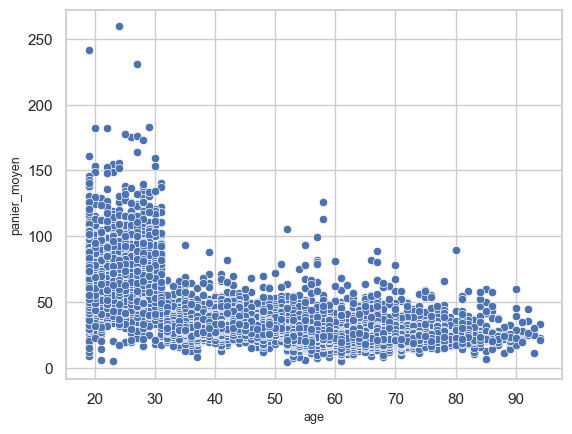

In [267]:
# Première visualisation de la relation entre les variables 'age' et 'total_ventes'

sns.scatterplot(df_corr4,
             x = 'age',
             y = 'panier_moyen')

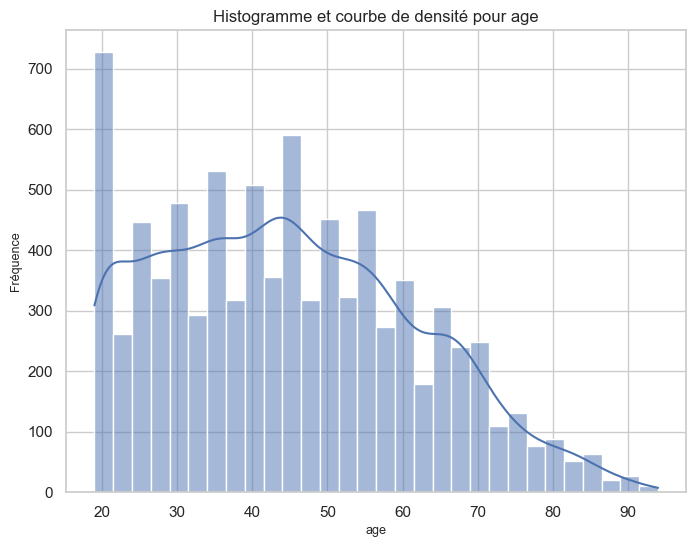

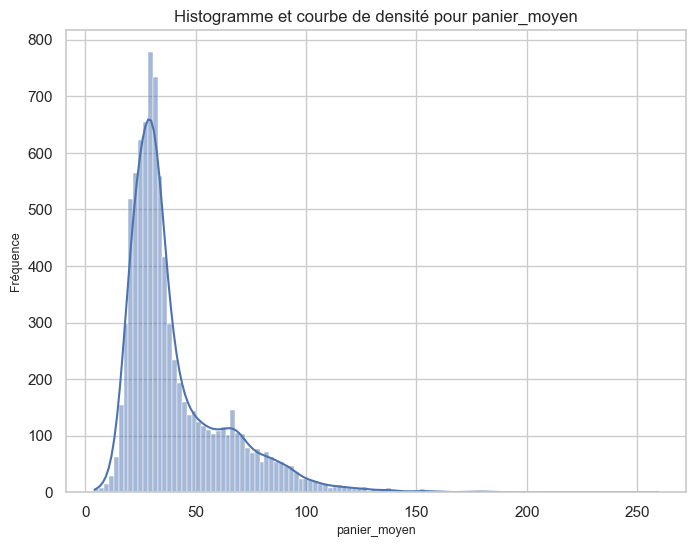

Skewness pour age: 0.3616824558729193
Kurtosis réel pour age: 2.366461911121336
Excès de kurtosis: age : -0.6335380888786641
Skewness pour panier_moyen: 1.922171247021988
Kurtosis réel pour panier_moyen: 8.587807943351098
Excès de kurtosis: panier_moyen : 5.587807943351098
P-valeur de la normalité (Kolmogorov-Smirnov) - age:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov - panier_moyen:  0.0


In [268]:
# Analyse de la normalité 

var1 = 'age'
var2 = 'panier_moyen'

# Analyse graphique de la normalité des deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_corr4[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité avec calcul du skewness et du kurtosis

for var in [var1, var2]:
    skewness = st.skew(df_corr4[var])
    kurtosis = st.kurtosis(df_corr4[var],fisher=False)
    excess_kurtosis = st.kurtosis(df_corr4[var])
    print(f"Skewness pour {var}: {skewness}")
    print(f"Kurtosis réel pour {var}: {kurtosis}")
    print(f"Excès de kurtosis: {var} : {excess_kurtosis}")
    

# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (groupes de + de 50 individus)
_, var1_p_value = st.kstest(df_corr4[var1], 'norm')
_, var2_p_value = st.kstest(df_corr4[var2], 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - age: ", var1_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov - panier_moyen: ", var2_p_value)


Les distributions ne sont pas normales, nous allons donc choisir le test de Spearman pour confirmer ou non l'hypothèse d'une corrélation monotone (visiblement non linéaire) entre nos deux variables quantitatives 'age' et 'panier_moyen'.

## Corrélation de Spearman

### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [269]:
# Corrélation de spearman

spearmanr(df_corr4['age'], df_corr4['panier_moyen'])

SignificanceResult(statistic=-0.7005485437703646, pvalue=0.0)

### Interprétation des résultats :

Le coefficient de Spearman est à -0.70, il existe donc une corrélation monotone, moyennement forte et négative entre nos deux variables (plus l'une augmente, plus l'autre baisse).

La p-valeur est inférieure à 0.05, on rejette donc l'hypothèse nulle et on conclut qu'il y a une corrélation entre l'âge et montant du panier moyen. 

## Confirmation avec coefficient de corrélation de Kendall :
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [270]:
# Calcul de la corrélation de kendall

kendalltau(df_corr4['age'], df_corr4['panier_moyen'])

SignificanceResult(statistic=-0.5075748738521069, pvalue=0.0)

**Même résultat**

P = 0, on peut rejeter H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.

Nous allons étudier discrétiser notre variable 'age' et étudier l'association entre notre nouvelle variable 'tranche_age' (qualitative) et 'panier_moyen' (quantitatif) 

<Axes: xlabel='tranche_age', ylabel='panier_moyen'>

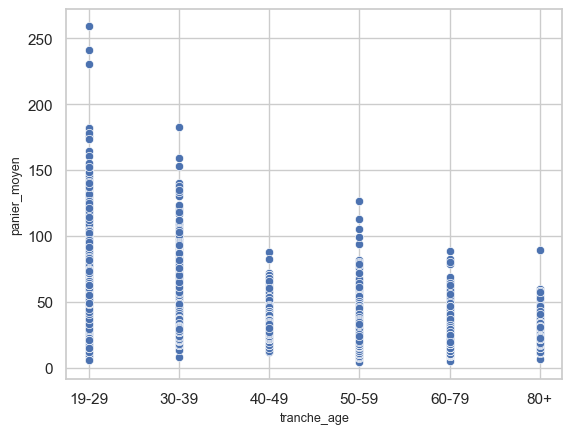

In [271]:
# Analyse graphique

sns.scatterplot(df_corr4,
             x = 'tranche_age',
             y = 'panier_moyen')

In [272]:
# Vérification de la normalité

# Séparer les données en groupes en fonction de la tranche d'âge

grp20ans = df_corr4[df_corr4['tranche_age'] == '19-29']['panier_moyen']
grp30ans = df_corr4[df_corr4['tranche_age'] == '30-39']['panier_moyen']
grp40ans = df_corr4[df_corr4['tranche_age'] == '40-49']['panier_moyen']
grp50ans = df_corr4[df_corr4['tranche_age'] == '50-59']['panier_moyen']
grp60_79ans = df_corr4[df_corr4['tranche_age'] == '60-79']['panier_moyen']
grp80_99ans = df_corr4[df_corr4['tranche_age'] == '80+']['panier_moyen']

# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (groupes de + de 50 individus)
_, grp20ans_p_value = st.kstest(grp20ans, 'norm')
_, grp30ans_p_value = st.kstest(grp30ans, 'norm')
_, grp40ans_p_value = st.kstest(grp40ans, 'norm')
_, grp50ans_p_value = st.kstest(grp50ans, 'norm')
_, grp60_79ans_p_value = st.kstest(grp60_79ans, 'norm')
_, grp80_99ans_p_value = st.kstest(grp80_99ans, 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 20ans: ", grp20ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov - tranche 30ans: ", grp30ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 40ans: ", grp40ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 50ans: ", grp50ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 60_79ans: ", grp60_79ans_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 80_99ans: ", grp80_99ans_p_value)

P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 20ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov - tranche 30ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 40ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 50ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 60_79ans:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - tranche 80_99ans:  0.0


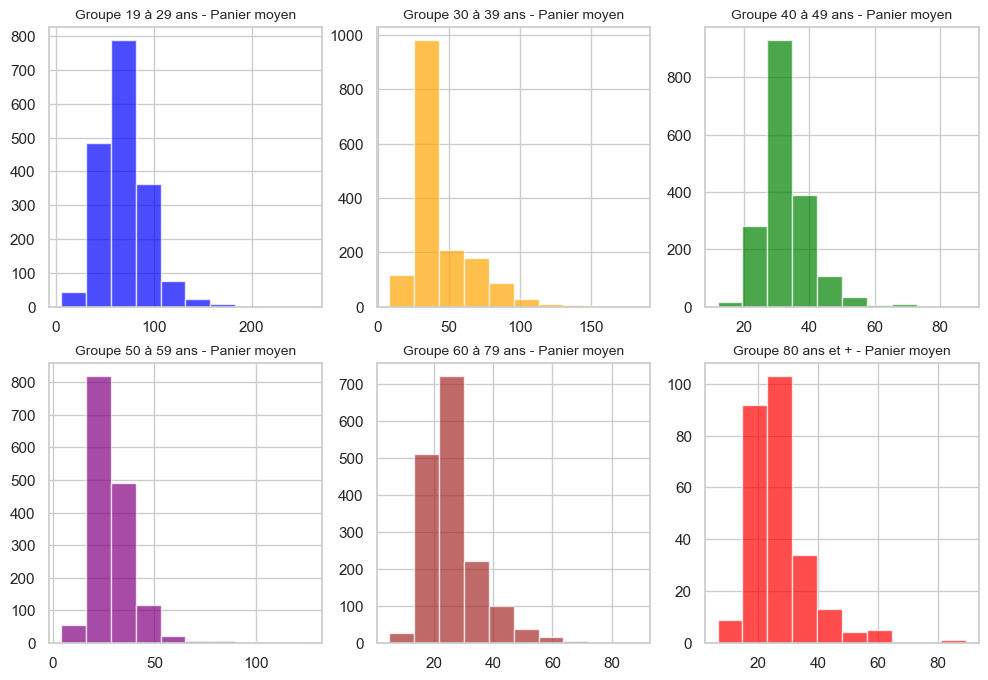

In [273]:
# Histogrammes pour vérifier visuellement la normalité

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.hist(grp20ans, bins=10, color='blue', alpha=0.7)
plt.title("Groupe 19 à 29 ans - Panier moyen", fontsize=10)

plt.subplot(232)
plt.hist(grp30ans, bins=10, color='orange', alpha=0.7)
plt.title("Groupe 30 à 39 ans - Panier moyen", fontsize=10)

plt.subplot(233)
plt.hist(grp40ans, bins=10, color='green', alpha=0.7)
plt.title("Groupe 40 à 49 ans - Panier moyen", fontsize=10)

plt.subplot(234)
plt.hist(grp50ans, bins=10, color='purple', alpha=0.7)
plt.title("Groupe 50 à 59 ans - Panier moyen", fontsize=10)

plt.subplot(235)
plt.hist(grp60_79ans, bins=10, color='brown', alpha=0.7)
plt.title("Groupe 60 à 79 ans - Panier moyen", fontsize=10)

plt.subplot(236)
plt.hist(grp80_99ans, bins=10, color='red', alpha=0.7)
plt.title("Groupe 80 ans et + - Panier moyen", fontsize=10)

plt.show()

#### Interprétation des résultats :

Les distributions des variables ne suivent pas une loi normale.

**Analyse graphique avec boxplots :**

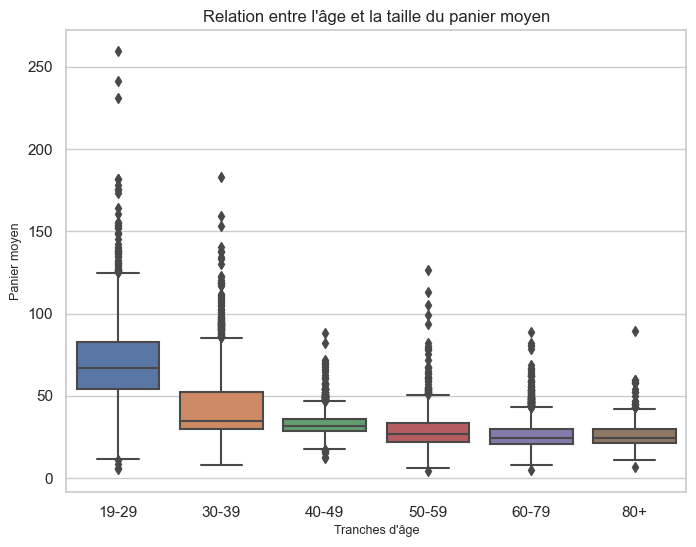

In [274]:
# Analyse visuelle par boxplot 

plt.figure(figsize=(8,6))
sns.boxplot(data=df_corr4, x='tranche_age', y='panier_moyen')
plt.xlabel("Tranches d'âge")
plt.ylabel('Panier moyen')
plt.title("Relation entre l'âge et la taille du panier moyen")
plt.show()

### Interprétation des résultats :

Visuellement, nous pouvons constater que la taille du panier moyen est très mal répartie entre les différents groupes. 
Le panier moyen pour la tranche d'âge 19/29 ans est très dispersée, contrairement aux tranches d'âge à partir de 40 ans.


Puisque les distributions ne suivent pas une loi normale, nous allons étudier les médianes et les distributions des différents groupes avec un test de Kruskal-Wallis.


## Test de Kruskal-Wallis ##
### Hypothèses

- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres

In [275]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(grp20ans, grp30ans, grp40ans, grp50ans, grp60_79ans, grp80_99ans)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)


Statistique H de Kruskal-Wallis : 4321.42965063158
P-valeur (Kruskal-Wallis) : 0.0


### Interprétation des résultats :

La P-valeur est inférieure à 0.05, l'hyposthèse nulle est rejetée. Donc il y a au moins une distribution qui est différente des autres. Nous allons donc les comparer 2 à 2 avec le test de Mann-Whitney.


Nous allons donc les comparer 2 à 2 avec le test de Mann-Whitney.


## Test de Mann-Whitney ##

### Hypothèses
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

In [276]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp20ans,grp30ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 2379423.5
P-valeur (Mann-Whitney) : 3.878645872101535e-231


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [277]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp30ans,grp40ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1806744.0
P-valeur (Mann-Whitney) : 4.8176509619070694e-39


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [278]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp40ans,grp50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1843061.5
P-valeur (Mann-Whitney) : 2.0660933035591552e-76


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [279]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp50ans,grp60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1439627.5
P-valeur (Mann-Whitney) : 1.5162588814448785e-14


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [280]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp60_79ans,grp80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 201775.5
P-valeur (Mann-Whitney) : 0.13322697043578258


Valeur de p > α : la différence entre les médianes n'est pas statistiquement significative (Impossible de rejeter H0)

In [281]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp20ans,grp40ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 3023494.5
P-valeur (Mann-Whitney) : 0.0


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [282]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp20ans,grp50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 2602269.0
P-valeur (Mann-Whitney) : 0.0


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [283]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp20ans,grp60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 2845662.5
P-valeur (Mann-Whitney) : 0.0


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [284]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp30ans,grp50ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 1876601.5
P-valeur (Mann-Whitney) : 4.9364992845311766e-145


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [285]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp30ans,grp60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 2210262.5
P-valeur (Mann-Whitney) : 1.3515800484183966e-235


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [286]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp30ans,grp80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 345757.5
P-valeur (Mann-Whitney) : 3.792850034483537e-61


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [287]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp40ans,grp60_79ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 2259095.0
P-valeur (Mann-Whitney) : 6.225356256165548e-173


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [288]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp40ans,grp80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 350982.5
P-valeur (Mann-Whitney) : 8.440435249845289e-42


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

In [289]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(grp50ans,grp80_99ans)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 218829.0
P-valeur (Mann-Whitney) : 0.005777223588388813


Valeur de p < α : la différence entre les médianes est statistiquement significative (on peut rejeter H0 pour ces 2 groupes)

## Interprétation des résultats : ##

### On peut donc confirmer : ###
- la distribution du groupe 20 ans est statistiquement différente de tous les groupes
- idem pour les groupes 30 ans, 40 ans et 50 ans
- les distributions des groupes 60 ans et 80 ans ne sont pas beaucoup différentes entre elles, mais tout de même différentes des autres groupes

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.5 - Lien entre l'âge des clients et la catégorie de livres achetés </h3>

In [290]:
# Récupération des données

df_corr5 = df2[['age','categorie','id_client']].copy()
df_corr5

,age,categorie,id_client
0,56,0,c_329
1,56,0,c_329
2,56,0,c_329
3,56,0,c_329
4,56,1,c_329
...,...,...,...
687529,26,2,c_7739
687530,26,2,c_7739
687531,56,1,c_712
687532,56,1,c_712


In [291]:
# Filtrage des clients pros dans un autre df

df_corr5_pros = df_corr1.loc[(df_corr1['id_client'] == 'c_1609') | (df_corr1['id_client'] == 'c_4958') |
                             (df_corr1['id_client'] =='c_6714') | (df_corr1['id_client'] =='c_3454'),:]
df_corr5_pros

,genre,categorie,id_client
84,Homme,0,c_1609
85,Homme,0,c_1609
86,Homme,0,c_1609
87,Homme,0,c_1609
88,Homme,0,c_1609
...,...,...,...
103783,Homme,2,c_4958
103784,Homme,2,c_4958
103785,Homme,2,c_4958
103786,Homme,1,c_4958


In [292]:
# Suppression des données pros

df_corr5 = df_corr5.drop(df_corr5_pros.index, axis=0)
df_corr5

,age,categorie,id_client
0,56,0,c_329
1,56,0,c_329
2,56,0,c_329
3,56,0,c_329
4,56,1,c_329
...,...,...,...
687529,26,2,c_7739
687530,26,2,c_7739
687531,56,1,c_712
687532,56,1,c_712


In [293]:
# Vérification

df_corr5.loc[(df_corr5['id_client'] == 'c_1609') | (df_corr5['id_client'] == 'c_4958') |
              (df_corr5['id_client'] =='c_6714') | (df_corr5['id_client'] =='c_3454'),:]

,age,categorie,id_client


In [294]:
# Vérification des données 

df_corr5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640734 entries, 0 to 687533
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        640734 non-null  int64 
 1   categorie  640734 non-null  int64 
 2   id_client  640734 non-null  object
dtypes: int64(2), object(1)
memory usage: 19.6+ MB


In [295]:
# Vérification des données

df_corr5.describe()

,age,categorie
count,640734.000000,640734.000000
mean,45.207976,0.446833
std,13.879682,0.591360
min,19.000000,0.000000
25%,36.000000,0.000000
50%,44.000000,0.000000
75%,52.000000,1.000000
max,94.000000,2.000000


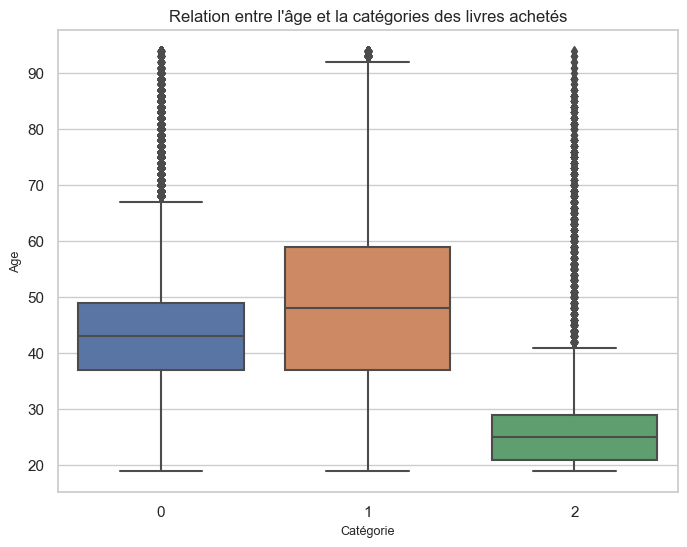

In [296]:
# Analyse visuelle par boxplot 

plt.figure(figsize=(8,6))
sns.boxplot(data=df_corr5, x='categorie', y='age')
plt.xlabel("Catégorie")
plt.ylabel('Age')
plt.title("Relation entre l'âge et la catégories des livres achetés")
plt.show()

Text(0.5, 1.0, 'Catégorie 2 - Age des clients')

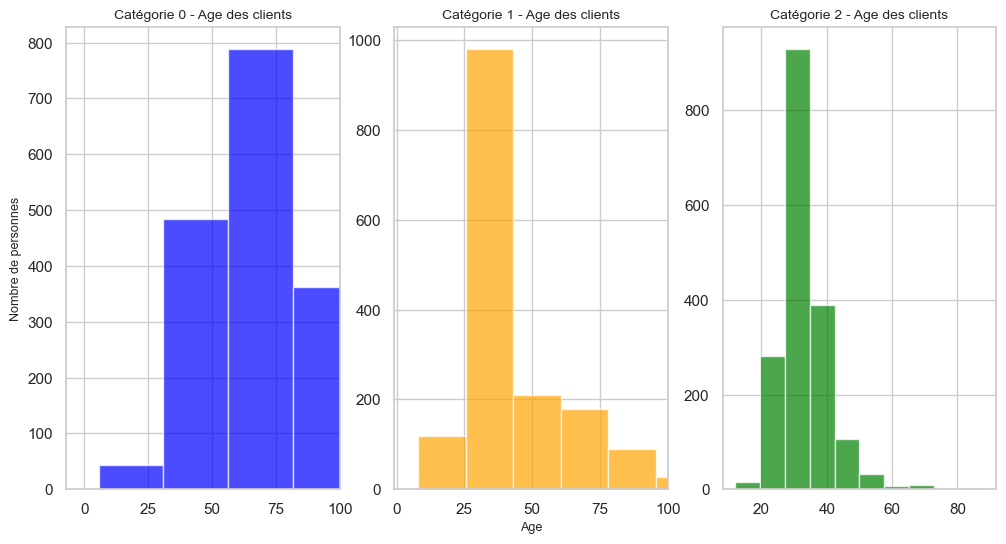

In [297]:
# Vérification de la normalité


# Séparer les données en groupes en fonction de la catégorie

cat0 = df_corr5[df_corr5['categorie'] == 0]['age']
cat1 = df_corr5[df_corr5['categorie'] == 1]['age']
cat2 = df_corr5[df_corr5['categorie'] == 2]['age']


# Visualisation des distributions

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.hist(grp20ans, bins=10, color='blue', alpha=0.7)
plt.title("Catégorie 0 - Age des clients", fontsize=10)
plt.ylabel("Nombre de personnes")
plt.xlim(right=100)

plt.subplot(132)
plt.hist(grp30ans, bins=10, color='orange', alpha=0.7)
plt.title("Catégorie 1 - Age des clients", fontsize=10)
plt.xlabel("Age")
plt.xlim(right=100)

plt.subplot(133)
plt.hist(grp40ans, bins=10, color='green', alpha=0.7)
plt.title("Catégorie 2 - Age des clients", fontsize=10)

In [298]:
# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (groupes de + de 50 individus)

_, cat0_p_value = st.kstest(cat0, 'norm')
_, cat1_p_value = st.kstest(cat1, 'norm')
_, cat2_p_value = st.kstest(cat2, 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - cat0: ", cat0_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov - cat1: ", cat1_p_value)
print("P-valeur de la normalité (Kolmogorov-Smirnov) - cat2: ", cat2_p_value)


P-valeur de la normalité (Kolmogorov-Smirnov) - cat0:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov - cat1:  0.0
P-valeur de la normalité (Kolmogorov-Smirnov) - cat2:  0.0


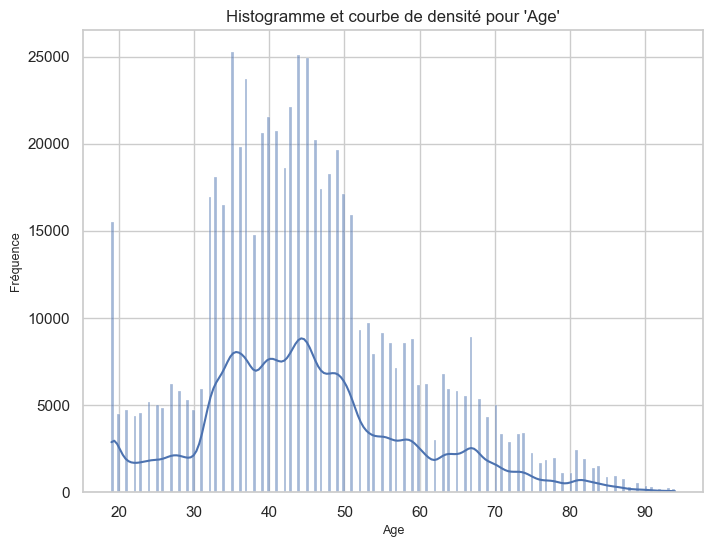

P-valeur de la normalité (Kolmogorov-Smirnov) - age:  0.0


In [299]:
# Visualisation de l'ensemble

plt.figure(figsize=(8, 6))
sns.histplot(df_corr5['age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour 'Age'")
plt.show()

age = df_corr5['age']
_, age_p_value = st.kstest(age, 'norm')

print("P-valeur de la normalité (Kolmogorov-Smirnov) - age: ", age_p_value)

### Interprétation des résultats ###

Les variables ne suivent pas une distribution normale. 
Nous allons tester une ANOVA puis confirmer ou non avec un test de Levene pour vérifier l'hypothèse d'homoscédasticité.


## ANOVA ##

### Hypothèses ###

- H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.

### Conditions d'utilisation ###
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.

In [300]:
# ANOVA
anova_stat, anova_p_value = f_oneway(cat0, cat1, cat2)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

Statistique F de l'ANOVA : 39705.51969324281
P-valeur (ANOVA) : 0.0


### Interprétation des résultats ###

La p-value rejette l'hypothèse nulle. Nous allons vérifier l'égalité des variances afin de valider ou non l'ANOVA avec un test de Levene.

## Test de Levene ##

### Hypothèses ###
- H0 (hypothèse nulle): Les variances des différents groupes sont égales.
- H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

In [301]:
# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(cat0, cat1, cat2)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

Statistique W de Levene : 24651.780367284304
P-valeur (Levene) : 0.0


### Interprétation des résultats ###

La p-value rejette l'hypothèse nulle. L'ANOVA n'est pas valide puisque les variances ne sont pas égales dans toutes les catégories. Nous allons donc partir sur un test de Kruskal-Wallis.

## Test de Kruskal-Wallis ##

### Hypothèses ###
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres

### Conditions d'utilisation ### 
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [302]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(cat0, cat1, cat2)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)


Statistique H de Kruskal-Wallis : 71359.73412120914
P-valeur (Kruskal-Wallis) : 0.0


### Interprétation des résultats :

La P-valeur est inférieure à 0.05, l'hyposthèse nulle est rejetée. Donc il y a au moins une distribution qui est différente des autres. Nous allons donc les comparer 2 à 2 avec le test de Mann-Whitney.


Nous allons donc les comparer 2 à 2 avec le test de Mann-Whitney.


## Test de Mann-Whitney ##

### Hypothèses
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

In [303]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(cat0,cat1)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 35935357000.0
P-valeur (Mann-Whitney) : 0.0


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [304]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(cat0,cat2)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 11701564252.0
P-valeur (Mann-Whitney) : 0.0


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

In [305]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(cat2,cat1)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 822449235.0
P-valeur (Mann-Whitney) : 0.0


Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette H0 pour ces 2 groupes.

### Interprétation des résultats :

La P-valeur est inférieure à 0.05, l'hypothèse nulle est rejetée pour tous les groupes.
On a bien une différence statistiquement significative de distributions entre les 3 groupes.

Nous allons discrétiser notre variable 'age' en tranches d'âge pour pour pouvoir analyser d'une façon différente / comparer les résultats (transformation en variable qualitative).

In [306]:
# Ajout de la tranche d'âge

age_bins = [19, 29, 39, 49, 59, 79, 100]
age_labels = ['19-29','30-39','40-49','50-59','60-79','80+']

df_corr5['tranche_age'] = pd.cut(x=df_corr5['age'], bins=age_bins, labels=age_labels, right=False)
df_corr5

,age,categorie,id_client,tranche_age
0,56,0,c_329,50-59
1,56,0,c_329,50-59
2,56,0,c_329,50-59
3,56,0,c_329,50-59
4,56,1,c_329,50-59
...,...,...,...,...
687529,26,2,c_7739,19-29
687530,26,2,c_7739,19-29
687531,56,1,c_712,50-59
687532,56,1,c_712,50-59


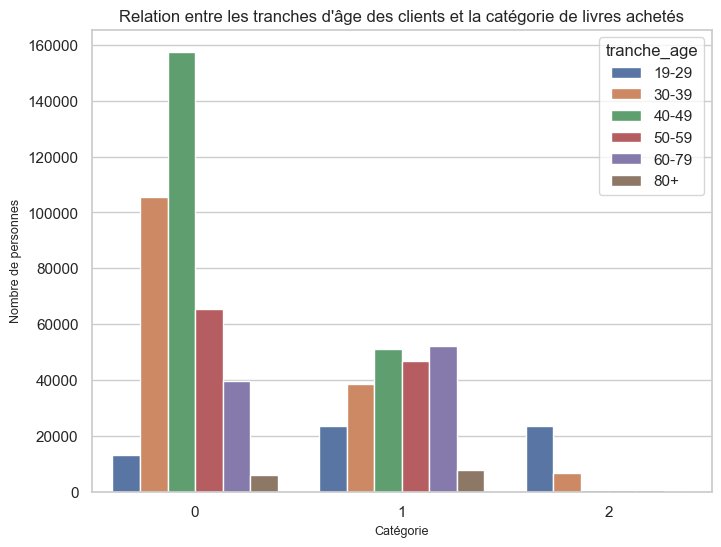

In [307]:
# Analyse graphique

plt.figure(figsize=(8, 6))
sns.countplot(data=df_corr5, x='categorie', hue='tranche_age')
plt.xlabel('Catégorie')
plt.ylabel("Nombre de personnes")
plt.title("Relation entre les tranches d'âge des clients et la catégorie de livres achetés")
plt.show()

In [308]:
# Création du tableau de contingence

table_contingence2 = pd.crosstab(df_corr5['categorie'], df_corr5['tranche_age'])
table_contingence2

tranche_age,19-29,30-39,40-49,50-59,60-79,80+
categorie,,,,,,
0,13365,105507,157479,65377,39649,5904
1,23616,38700,51264,46917,52109,7999
2,23630,6763,754,743,825,133


In [309]:
# Test du Chi-2 et affichage des résultats

chi2_stat, p_value, dof, expected_freq = chi2_contingency(table_contingence2)

print('Statistique du chi-carré : {}'.format(chi2_stat))
print('P-valeur : {}'.format(p_value))
print('Degrés de liberté : {}'.format(dof))
print('Fréquences attendues : \n{}'.format(expected_freq))


Statistique du chi-carré : 209618.23052461498
P-valeur : 0.0
Degrés de liberté : 10
Fréquences attendues : 
[[ 36635.30995858  91251.30330215 126626.97415308  68323.33292287
   55960.25312064   8483.82654268]
 [ 20868.3941464   51979.03786907  72129.9098924   38918.68916742
   31876.36790774   4832.60101696]
 [  3107.29589502   7739.65882878  10740.11595451   5794.97790971
    4746.37897162    719.57244036]]


#### Interprétation des résultats :

Coefficient du Chi-2 > Valeur critique (25.188), il y a donc association.

La p-valeur est inférieure à 0.05, on peut rejeter l'hypothèse nulle.
Il y a bien une association entre nos 2 variables.

Nous allons donc mesurer la force de cette association avec un test de Cramer-V.

In [310]:
# Calculer le coefficient de Cramer-V
n = table_contingence2.sum().sum()
min_dim = min(table_contingence2.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramer-V
print("Coefficient de Cramer-V :", cramer_v)

Coefficient de Cramer-V : 0.40444609113900976


**Interprétation des résultats**

Coefficient > 0.30, cela indique que nous avons une relation moyennement forte entre nos 2 variables et confirme donc qu'il y a bien une association. Nous allons chercher à confirmer celle-ci avec un test de Tschuprow.


## Coefficient T de Tschuprow

### Hypothèses :

- H0 (hypothèse nulle): Il n'y a pas de relation entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une relation entre les deux variables qualitatives.

In [311]:
# Calcul du coefficient T de Tschuprow

n = df_corr5.shape[0]
min_dim = min(table_contingence2.shape) - 1

chi2, p_value, _, _ = st.chi2_contingency(table_contingence2)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)

Coefficient T de Tschuprow : 0.40444609113900976
P-valeur : 0.0


#### Interprétation des résultats :

Même résultat, on peut rejeter H0 (p-valeur = 0), et affirmer qu'il y a une association entre nos 2 variables 'tranche_age' et 'categorie'.